In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
import seaborn as sb

import os

# Define the path to the directory you want to change to
new_directory = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/DEG_analysis/Microglia'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

In [2]:
save_dir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/DEG_analysis/Microglia'

# Set up DEG lists

In [3]:
LPC_demyel_2 = pd.read_csv('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep/files/LPC_demyel_Mg_A_v_BAMs_voom_wqw_NEW.csv', index_col=None)
LPC_demyel_2.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_2.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_2.shape

(9436, 7)

In [4]:
LPC_demyel = pd.read_csv('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep/files/LPC_demyel_Mg_A_v_trt_voom_wqw_NEW.csv', index_col=None)
LPC_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel.shape

(10659, 7)

In [5]:
LPC_remyel = pd.read_csv('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep/files/LPC_remyel_MG_DAMs_voom_wqw.csv', index_col=None)
LPC_remyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_remyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_remyel.shape

(10358, 7)

In [6]:
Cupr_demyel = pd.read_csv('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep/files/Cupr_demyel_Mg_A_v_trt_voom_wqw_NEW.csv', index_col=None)
Cupr_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_demyel.shape

(10148, 7)

In [7]:
Cupr_remyel = pd.read_csv('/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep/files/Cupr_remyel_MG_DAM_voom_wqw.csv', index_col=None)
Cupr_remyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_remyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_remyel.shape

(9300, 7)

In [8]:
# Filter for upregulated genes
LPC_demyel_2_up = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC >= 0.585)]
print(LPC_demyel_2_up.shape)

# Filter for downregulated genes
LPC_demyel_2_down = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC <= -0.585)]
print(LPC_demyel_2_down.shape)

(1446, 7)
(3677, 7)


In [9]:
# Filter for upregulated genes
LPC_de_up = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC >= 0.585)]
print(LPC_de_up.shape)

# Filter for downregulated genes
LPC_de_down = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC <= -0.585)]
print(LPC_de_down.shape)

(1083, 7)
(2903, 7)


In [10]:
# Filter for upregulated genes
LPC_re_up = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC >= 0.585)]
print(LPC_re_up.shape)

# Filter for downregulated genes
LPC_re_down = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC <= -0.585)]
print(LPC_re_down.shape)

(728, 7)
(2564, 7)


In [11]:
# Filter for upregulated genes
Cupr_de_up = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC >= 0.585)]
print(Cupr_de_up.shape)

# Filter for downregulated genes
Cupr_de_down = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC <= -0.585)]
print(Cupr_de_down.shape)

(1107, 7)
(4365, 7)


In [12]:
# Filter for upregulated genes
Cupr_re_up = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC >= 0.585)]
print(Cupr_re_up.shape)

# Filter for downregulated genes
Cupr_re_down = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC <= -0.585)]
print(Cupr_re_down.shape)

(430, 7)
(1085, 7)


# Add human data

In [3]:
Mg_hs_d = pd.read_csv('./files/MG_DvA_WM_v_AL_dream.csv', index_col=None)
Mg_hs_d.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Mg_hs_d.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Mg_hs_d.shape

(9040, 9)

In [4]:
Mg_hs_e = pd.read_csv('./files/MG_EvA_WM_v_AL_dream.csv', index_col=None)
Mg_hs_e.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Mg_hs_e.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Mg_hs_e.shape

(8897, 9)

In [5]:
Mg_hs_f = pd.read_csv('./files/MG_FvA_WM_v_RL_dream.csv', index_col=None)
Mg_hs_f.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Mg_hs_f.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Mg_hs_f.shape

(10168, 9)

In [6]:
Mg_hs_d['logFC'] = Mg_hs_d['logFC'] * -1
Mg_hs_d[:5]

,gene,logFC,AveExpr,t,Pvalue,Padj,B,z.std,gene.1
0,MYO1E,3.663872,9.429126,-15.185077,6.851893e-13,3.117062e-09,19.478874,-7.182359,MYO1E
1,IL6ST,-2.269453,8.269909,15.180076,6.896154e-13,3.117062e-09,19.408673,7.181478,IL6ST
2,ABCC4,-2.112693,9.257283,13.787137,4.456471e-12,1.342883e-08,17.707020,6.921893,ABCC4
3,BLNK,-1.892693,8.376377,12.966488,1.439085e-11,3.252332e-08,16.584543,6.753915,BLNK
4,ST6GALNAC3,-3.418599,9.508784,12.256273,4.164442e-11,7.529310e-08,15.546988,6.598106,ST6GALNAC3


In [7]:
Mg_hs_e['logFC'] = Mg_hs_e['logFC'] * -1
Mg_hs_e[:5]

,gene,logFC,AveExpr,t,Pvalue,Padj,B,z.std,gene.1
0,ST6GALNAC3,-3.607608,9.301374,14.954922,1.839725e-13,1.636803e-09,20.846418,7.359955,ST6GALNAC3
1,MITF,2.584601,8.405525,-14.122856,6.169291e-13,1.640748e-09,19.679651,-7.196688,MITF
2,TMEM156,-2.251460,7.480863,14.022326,7.168029e-13,1.640748e-09,19.530829,7.176191,TMEM156
3,ABCC4,-2.225773,9.108282,13.783596,1.027183e-12,1.640748e-09,19.198405,7.126815,ABCC4
4,SERPINB9,-3.628969,6.308778,14.098475,1.046810e-12,1.640748e-09,14.113083,7.124208,SERPINB9


In [8]:
Mg_hs_f['logFC'] = Mg_hs_f['logFC'] * -1
Mg_hs_f[:5]

,gene,logFC,AveExpr,t,Pvalue,Padj,B,z.std,gene.1
0,PLXNC1,4.977773,4.649426,-16.255692,2.048165e-10,0.000002,14.083097,-6.357685,PLXNC1
1,EMILIN2,4.500667,2.496653,-13.673130,1.970558e-09,0.000008,11.794060,-6.000215,EMILIN2
2,PTPN22,4.157709,3.407846,-13.456588,2.422768e-09,0.000008,11.794833,-5.966581,PTPN22
3,ATP6AP2,1.921152,5.251481,-14.628837,7.633830e-09,0.000019,12.875851,-5.776350,ATP6AP2
4,TGFBI,7.448151,3.187120,-12.125474,1.838235e-08,0.000034,3.413571,-5.626574,TGFBI


In [9]:
# Filter for upregulated genes
Mg_hs_d_up = Mg_hs_d[(Mg_hs_d.Padj < 0.05) & (Mg_hs_d.logFC >= 0.585)]
print(Mg_hs_d_up.shape)

# Filter for downregulated genes
Mg_hs_d_down = Mg_hs_d[(Mg_hs_d.Padj < 0.05) & (Mg_hs_d.logFC <= -0.585)]
print(Mg_hs_d_down.shape)

(1050, 9)
(757, 9)


In [10]:
# Filter for upregulated genes
Mg_hs_e_up = Mg_hs_e[(Mg_hs_e.Padj < 0.05) & (Mg_hs_e.logFC >= 0.585)]
print(Mg_hs_e_up.shape)

# Filter for downregulated genes
Mg_hs_e_down = Mg_hs_e[(Mg_hs_e.Padj < 0.05) & (Mg_hs_e.logFC <= -0.585)]
print(Mg_hs_e_down.shape)

(932, 9)
(817, 9)


In [11]:
# Filter for upregulated genes
Mg_hs_f_up = Mg_hs_f[(Mg_hs_f.Padj < 0.05) & (Mg_hs_f.logFC >= 0.585)]
print(Mg_hs_f_up.shape)

# Filter for downregulated genes
Mg_hs_f_down = Mg_hs_f[(Mg_hs_f.Padj < 0.05) & (Mg_hs_f.logFC <= -0.585)]
print(Mg_hs_f_down.shape)

(986, 9)
(587, 9)


# Venns-- before subsetting for homologs

In [12]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_conditions = set(Mg_hs_d['gene']) & \
                       set(Mg_hs_e['gene']) & \
                       set(Mg_hs_f['gene'])
len(genes_all_conditions)

7856

In [13]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
Mg_hs_d_sub = filter_genes(Mg_hs_d)
Mg_hs_e_sub = filter_genes(Mg_hs_e)
Mg_hs_f_sub = filter_genes(Mg_hs_f)

print(Mg_hs_d_sub.shape)
print(Mg_hs_e_sub.shape)
print(Mg_hs_f_sub.shape)

(7856, 9)
(7856, 9)
(7856, 9)


In [14]:
# Filter for upregulated genes
Mg_hs_d_up = Mg_hs_d_sub[(Mg_hs_d_sub.Padj < 0.05) & (Mg_hs_d_sub.logFC >= 0.585)]
print(Mg_hs_d_up.shape)

# Filter for downregulated genes
Mg_hs_d_down = Mg_hs_d_sub[(Mg_hs_d_sub.Padj < 0.05) & (Mg_hs_d_sub.logFC <= -0.585)]
print(Mg_hs_d_down.shape)

(719, 9)
(751, 9)


In [15]:
# Filter for upregulated genes
Mg_hs_e_up = Mg_hs_e_sub[(Mg_hs_e_sub.Padj < 0.05) & (Mg_hs_e_sub.logFC >= 0.585)]
print(Mg_hs_e_up.shape)

# Filter for downregulated genes
Mg_hs_e_down = Mg_hs_e_sub[(Mg_hs_e_sub.Padj < 0.05) & (Mg_hs_e_sub.logFC <= -0.585)]
print(Mg_hs_e_down.shape)

(711, 9)
(791, 9)


In [16]:
# Filter for upregulated genes
Mg_hs_f_up = Mg_hs_f_sub[(Mg_hs_f_sub.Padj < 0.05) & (Mg_hs_f_sub.logFC >= 0.585)]
print(Mg_hs_f_up.shape)

# Filter for downregulated genes
Mg_hs_f_down = Mg_hs_f_sub[(Mg_hs_f_sub.Padj < 0.05) & (Mg_hs_f_sub.logFC <= -0.585)]
print(Mg_hs_f_down.shape)

(669, 9)
(497, 9)


## Venns on overlapping genes only

In [20]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

In [21]:
# Convert lists to sets
genes_Mg_hs_d_up = Mg_hs_d_up['gene'].tolist()
genes_Mg_hs_e_up = Mg_hs_e_up['gene'].tolist()
genes_Mg_hs_f_up = Mg_hs_f_up['gene'].tolist()

set_Mg_hs_d_up = set(genes_Mg_hs_d_up)
set_Mg_hs_e_up = set(genes_Mg_hs_e_up)
set_Mg_hs_f_up = set(genes_Mg_hs_f_up)

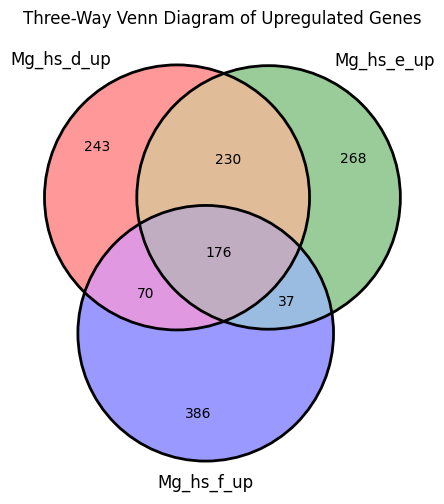

In [22]:
# Create the Venn diagram
plt.figure(figsize=(6,6))
venn = venn3([set_Mg_hs_d_up, set_Mg_hs_e_up, set_Mg_hs_f_up], 
             ('Mg_hs_d_up', 'Mg_hs_e_up', 'Mg_hs_f_up'))

# Add the circles around the sets
venn3_circles([set_Mg_hs_d_up, set_Mg_hs_e_up, set_Mg_hs_f_up])

# Display the plot
plt.title("Three-Way Venn Diagram of Upregulated Genes")
plt.show()

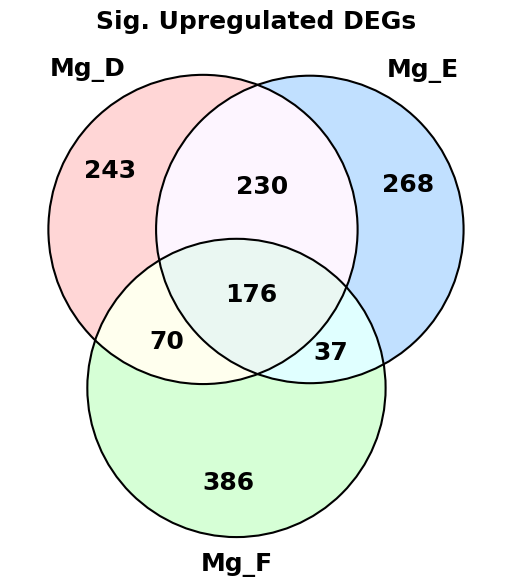

In [23]:
# Define the colors for each set
colors = ('#ff9999', '#66b3ff', '#99ff99')  # Example colors (red, blue, green)

# Create the figure
plt.figure(figsize=(7,7))

# Create the Venn diagram with custom colors
venn = venn3([set_Mg_hs_d_up, set_Mg_hs_e_up, set_Mg_hs_f_up], 
             ('Mg_D', 'Mg_E', 'Mg_F'),
             set_colors=colors)

# Customize font size and weight
for text in venn.set_labels:
    if text:  # Check if text exists
        text.set_fontsize(18)
        text.set_fontweight('bold')

for text in venn.subset_labels:
    if text:  # Check if text exists
        text.set_fontsize(18)
        text.set_fontweight('bold')

# Customize circle weight
venn3_circles([set_Mg_hs_d_up, set_Mg_hs_e_up, set_Mg_hs_f_up], linewidth=1.5)  # Adjust circle thickness

# Title
plt.title("Sig. Upregulated DEGs", fontsize=18, fontweight='bold')
plt.savefig("venn3_MG_up.png", dpi=300, bbox_inches='tight')  # Saves with high resolution

# Show the plot
plt.show()

In [24]:
# Convert lists to sets
genes_Mg_hs_d_down = Mg_hs_d_down['gene'].tolist()
genes_Mg_hs_e_down = Mg_hs_e_down['gene'].tolist()
genes_Mg_hs_f_down = Mg_hs_f_down['gene'].tolist()

set_Mg_hs_d_down = set(genes_Mg_hs_d_down)
set_Mg_hs_e_down = set(genes_Mg_hs_e_down)
set_Mg_hs_f_down = set(genes_Mg_hs_f_down)

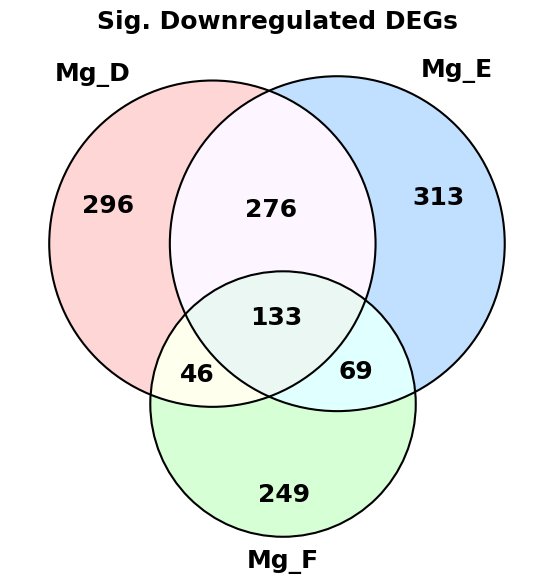

In [25]:
# Define the colors for each set
colors = ('#ff9999', '#66b3ff', '#99ff99')  # Example colors (red, blue, green)

# Create the figure
plt.figure(figsize=(7,7))

# Create the Venn diagram with custom colors
venn = venn3([set_Mg_hs_d_down, set_Mg_hs_e_down, set_Mg_hs_f_down], 
             ('Mg_D', 'Mg_E', 'Mg_F'),
             set_colors=colors)

# Customize font size and weight
for text in venn.set_labels:
    if text:  # Check if text exists
        text.set_fontsize(18)
        text.set_fontweight('bold')

for text in venn.subset_labels:
    if text:  # Check if text exists
        text.set_fontsize(18)
        text.set_fontweight('bold')

# Customize circle weight
venn3_circles([set_Mg_hs_d_down, set_Mg_hs_e_down, set_Mg_hs_f_down], linewidth=1.5)  # Adjust circle thickness

# Title
plt.title("Sig. Downregulated DEGs", fontsize=18, fontweight='bold')
plt.savefig("venn3_MG_down.png", dpi=300, bbox_inches='tight')  # Saves with high resolution

# Show the plot
plt.show()

## Two ways

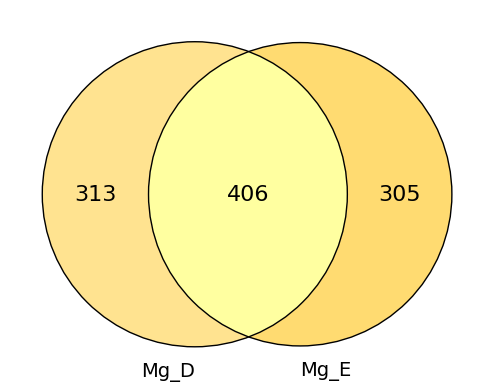

In [26]:
# Convert lists to sets
genes_Mg_hs_d_up = Mg_hs_d_up['gene'].tolist()
genes_Mg_hs_e_up = Mg_hs_e_up['gene'].tolist()

set_LPC_de_MOL_up = set(genes_Mg_hs_d_up)
set_LPC_re_MOL_up = set(genes_Mg_hs_e_up)

# Calculate lengths and overlap
length_LPC_de = len(set_LPC_de_MOL_up) - len(set_LPC_de_MOL_up & set_LPC_re_MOL_up)
length_LPC_re = len(set_LPC_re_MOL_up) - len(set_LPC_de_MOL_up & set_LPC_re_MOL_up)

genes_common_up = set_LPC_de_MOL_up & set_LPC_re_MOL_up
length_common = len(genes_common_up)

# Set labels and colors
set_labels = ('Mg_D', 'Mg_E')
set_colors = ('#ffdd75', '#ffd34e')

# Plot Venn diagram
venn = venn2(subsets=(length_LPC_de, length_LPC_re, length_common),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.8)  # Adjust transparency here

venn2_circles(subsets=(length_LPC_de, length_LPC_re, length_common), linewidth=1)

# Increase font size for the subset counts inside the circles
for subset in venn.subset_labels:
    subset.set_fontsize(16)  # Set the font size for the text inside the circles

# Increase text size for the set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
#plt.title('Sig. up DEGs in AL/CAL Mg_DvE', fontsize=16)
#plt.savefig('./figures/venn2_MOL_de_re_up.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [27]:
set_Mg_hs_d_up = set(genes_Mg_hs_d_up)
set_Mg_hs_e_up = set(genes_Mg_hs_e_up)

# Find genes unique to Mg_hs_d_up
unique_to_Mg_hs_d_up = set_Mg_hs_d_up.difference(set_Mg_hs_e_up)

# Find genes unique to Mg_hs_e_up
unique_to_Mg_hs_e_up = set_Mg_hs_e_up.difference(set_Mg_hs_d_up)

# Convert back to lists if needed
unique_to_Mg_hs_d_up_list = list(unique_to_Mg_hs_d_up)
unique_to_Mg_hs_e_up_list = list(unique_to_Mg_hs_e_up)

# Print the results (optional)
print("Genes unique to Mg_hs_d_up:", unique_to_Mg_hs_d_up_list)
print("Genes unique to Mg_hs_e_up:", unique_to_Mg_hs_e_up_list)

Genes unique to Mg_hs_d_up: ['JMJD6', 'S100A11', 'IRF7', 'NUCB1', 'HSF1', 'HKR1', 'CEP164', 'CRTC1', 'NUDT2', 'GARS', 'AC066613.2', 'ZYX', 'PPP1R12C', 'FBXW5', 'XYLT1', 'STX4', 'GPI', 'RANBP2', 'ARFGAP3', 'SELENOS', 'ITGAV', 'CORO1C', 'IL21R', 'EIF4G2', 'MIER2', 'SLC7A5', 'VPS18', 'CD58', 'PLA2G15', 'SLC30A1', 'ESYT2', 'IFIT2', 'LMAN2', 'DPYD-AS1', 'RCC1', 'MAP2K3', 'PPM1G', 'NEK6', 'CALU', 'CMTM3', 'PRKCSH', 'MIR4435-2HG', 'GFOD1', 'AC093895.1', 'SRRT', 'MBD3', 'ITPRIP', 'SBNO2', 'SERPINH1', 'UCP2', 'TNFRSF11B', 'SH3BGRL3', 'WARS', 'BRD9', 'PIM1', 'CCDC57', 'ANKH', 'FAM110B', 'OAS2', 'VAV2', 'SLC31A1', 'SPPL2A', 'SLC11A1', 'ABHD17A', 'RP2', 'PDGFA', 'UPP1', 'PA2G4', 'GBP2', 'CUX1', 'PADI2', 'ACOT9', 'ATF5', 'SLC16A1-AS1', 'EIPR1', 'IFIH1', 'IFNLR1', 'IFIT3', 'BCL2', 'CPNE2', 'ALAS1', 'IARS', 'DOK3', 'ATF3', 'CTDSPL', 'DLGAP4', 'FHL3', 'MAST2', 'ECPAS', 'AC068234.1', 'PYGL', 'APOBR', 'DHDDS', 'TNFAIP3', 'LRP5L', 'BCL2L1', 'DESI1', 'TMED5', 'BAHD1', 'NFKB1', 'APLP2', 'ARHGAP30', 'PTPN1'

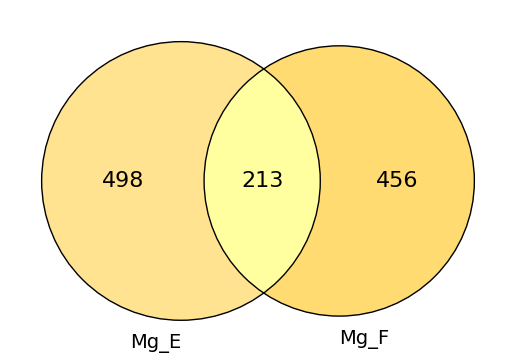

In [28]:
# Convert lists to sets
genes_Mg_hs_e_up = Mg_hs_e_up['gene'].tolist()
genes_Mg_hs_f_up = Mg_hs_f_up['gene'].tolist()

set_LPC_de_MOL_up = set(genes_Mg_hs_e_up)
set_LPC_re_MOL_up = set(genes_Mg_hs_f_up)

# Calculate lengths and overlap
length_LPC_de = len(set_LPC_de_MOL_up) - len(set_LPC_de_MOL_up & set_LPC_re_MOL_up)
length_LPC_re = len(set_LPC_re_MOL_up) - len(set_LPC_de_MOL_up & set_LPC_re_MOL_up)

genes_common_up = set_LPC_de_MOL_up & set_LPC_re_MOL_up
length_common = len(genes_common_up)

# Set labels and colors
set_labels = ('Mg_E', 'Mg_F')
set_colors = ('#ffdd75', '#ffd34e')

# Plot Venn diagram
venn = venn2(subsets=(length_LPC_de, length_LPC_re, length_common),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.8)  # Adjust transparency here

venn2_circles(subsets=(length_LPC_de, length_LPC_re, length_common), linewidth=1)

# Increase font size for the subset counts inside the circles
for subset in venn.subset_labels:
    subset.set_fontsize(16)  # Set the font size for the text inside the circles

# Increase text size for the set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
#plt.title('Sig. up DEGs in AL/CAL Mg_DvE', fontsize=16)
#plt.savefig('./figures/venn2_MOL_de_re_up.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [29]:
set_Mg_hs_d_up = set(genes_Mg_hs_e_up)
set_Mg_hs_e_up = set(genes_Mg_hs_f_up)

# Find genes unique to Mg_hs_d_up
unique_to_Mg_hs_d_up = set_Mg_hs_d_up.difference(set_Mg_hs_e_up)

# Find genes unique to Mg_hs_e_up
unique_to_Mg_hs_e_up = set_Mg_hs_e_up.difference(set_Mg_hs_d_up)

# Convert back to lists if needed
unique_to_Mg_hs_d_up_list = list(unique_to_Mg_hs_d_up)
unique_to_Mg_hs_e_up_list = list(unique_to_Mg_hs_e_up)

# Print the results (optional)
print(len(unique_to_Mg_hs_d_up_list))
print("Genes unique to Mg_hs_d_up:", unique_to_Mg_hs_d_up_list)
print(len(unique_to_Mg_hs_e_up_list))
print("Genes unique to Mg_hs_e_up:", unique_to_Mg_hs_e_up_list)

498
Genes unique to Mg_hs_d_up: ['PLD3', 'DENND4C', 'SGF29', 'SLC35E3', 'MELTF', 'SQSTM1', 'ATP2B4', 'PTPRM', 'SIGLEC1', 'MCRIP1', 'FP236383.1', 'STK40', 'MAP3K9', 'TXNL4B', 'BEAN1', 'AMDHD2', 'COPE', 'PRKD2', 'TEX2', 'STX2', 'SLC2A9', 'CYP27A1', 'FAAP20', 'EFCAB2', 'PLEKHM2', 'LMTK2', 'DZIP1L', 'PVT1', 'PLBD2', 'USE1', 'MSR1', 'MED25', 'FLVCR2', 'AGAP3', 'VAMP8', 'TULP3', 'CD44', 'MBD6', 'NAGLU', 'CPM', 'AC092338.1', 'BMF', 'ATXN1', 'EPG5', 'AC093827.5', 'TSPAN32', 'DPP7', 'RPH3AL', 'ME3', 'CPT1A', 'ZNF804A', 'KLHL6', 'AC068533.4', 'PLIN3', 'SPART', 'AP2A2', 'BCAT2', 'NBPF14', 'PPP1CA', 'GOLIM4', 'RNF6', 'ARHGEF10L', 'AC240274.1', 'S100A13', 'DNAJC9', 'SIDT2', 'NRP2', 'ACOT11', 'MAZ', 'JRKL', 'TNS1', 'C11orf80', 'SLC36A1', 'DIP2C', 'MS4A6A', 'SNAP29', 'TMEM181', 'GNG12-AS1', 'EPHX1', 'ATP6V0D1', 'FMNL2', 'IDH3G', 'MX2', 'SLC38A7', 'OPTN', 'SCAMP3', 'ABAT', 'FAM151B', 'EEF1D', 'AC074117.1', 'C3orf62', 'CATSPERE', 'ABHD3', 'SCARB1', 'PLXNA3', 'COL4A2', 'INO80D', 'CHCHD6', 'MS4A4E', 'PCA

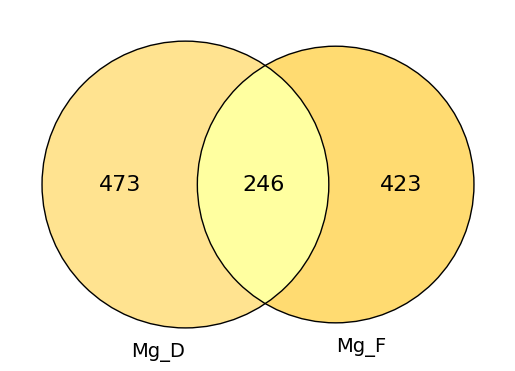

In [30]:
# Convert lists to sets
genes_Mg_hs_d_up = Mg_hs_d_up['gene'].tolist()
genes_Mg_hs_f_up = Mg_hs_f_up['gene'].tolist()

set_LPC_de_MOL_up = set(genes_Mg_hs_d_up)
set_LPC_re_MOL_up = set(genes_Mg_hs_f_up)

# Calculate lengths and overlap
length_LPC_de = len(set_LPC_de_MOL_up) - len(set_LPC_de_MOL_up & set_LPC_re_MOL_up)
length_LPC_re = len(set_LPC_re_MOL_up) - len(set_LPC_de_MOL_up & set_LPC_re_MOL_up)

genes_common_up = set_LPC_de_MOL_up & set_LPC_re_MOL_up
length_common = len(genes_common_up)

# Set labels and colors
set_labels = ('Mg_D', 'Mg_F')
set_colors = ('#ffdd75', '#ffd34e')

# Plot Venn diagram
venn = venn2(subsets=(length_LPC_de, length_LPC_re, length_common),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.8)  # Adjust transparency here

venn2_circles(subsets=(length_LPC_de, length_LPC_re, length_common), linewidth=1)

# Increase font size for the subset counts inside the circles
for subset in venn.subset_labels:
    subset.set_fontsize(16)  # Set the font size for the text inside the circles

# Increase text size for the set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
#plt.title('Sig. up DEGs in AL/CAL Mg_DvE', fontsize=16)
#plt.savefig('./figures/venn2_MOL_de_re_up.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [31]:
set_Mg_hs_d_up = set(genes_Mg_hs_d_up)
set_Mg_hs_e_up = set(genes_Mg_hs_e_up)

# Find genes unique to Mg_hs_d_up
unique_to_Mg_hs_d_up = set_Mg_hs_d_up.difference(set_Mg_hs_e_up)

# Find genes unique to Mg_hs_e_up
unique_to_Mg_hs_e_up = set_Mg_hs_e_up.difference(set_Mg_hs_d_up)

# Convert back to lists if needed
unique_to_Mg_hs_d_up_list = list(unique_to_Mg_hs_d_up)
unique_to_Mg_hs_e_up_list = list(unique_to_Mg_hs_e_up)

# Print the results (optional)
print("Genes unique to Mg_hs_d_up:", unique_to_Mg_hs_d_up_list)
print("Genes unique to Mg_hs_e_up:", unique_to_Mg_hs_e_up_list)

Genes unique to Mg_hs_d_up: ['JMJD6', 'S100A11', 'IRF7', 'NUCB1', 'HSF1', 'HKR1', 'CEP164', 'CRTC1', 'NUDT2', 'GARS', 'AC066613.2', 'ZYX', 'PPP1R12C', 'FBXW5', 'XYLT1', 'STX4', 'GPI', 'RANBP2', 'ARFGAP3', 'SELENOS', 'ITGAV', 'CORO1C', 'IL21R', 'EIF4G2', 'MIER2', 'SLC7A5', 'VPS18', 'CD58', 'PLA2G15', 'SLC30A1', 'ESYT2', 'IFIT2', 'LMAN2', 'DPYD-AS1', 'RCC1', 'MAP2K3', 'PPM1G', 'NEK6', 'CALU', 'CMTM3', 'PRKCSH', 'MIR4435-2HG', 'GFOD1', 'AC093895.1', 'SRRT', 'MBD3', 'ITPRIP', 'SBNO2', 'SERPINH1', 'UCP2', 'TNFRSF11B', 'SH3BGRL3', 'WARS', 'BRD9', 'PIM1', 'CCDC57', 'ANKH', 'FAM110B', 'OAS2', 'VAV2', 'SLC31A1', 'SPPL2A', 'SLC11A1', 'ABHD17A', 'RP2', 'PDGFA', 'UPP1', 'PA2G4', 'GBP2', 'CUX1', 'PADI2', 'ACOT9', 'ATF5', 'SLC16A1-AS1', 'EIPR1', 'IFIH1', 'IFNLR1', 'IFIT3', 'BCL2', 'CPNE2', 'ALAS1', 'IARS', 'DOK3', 'ATF3', 'CTDSPL', 'DLGAP4', 'FHL3', 'MAST2', 'ECPAS', 'AC068234.1', 'PYGL', 'APOBR', 'DHDDS', 'TNFAIP3', 'LRP5L', 'BCL2L1', 'DESI1', 'TMED5', 'BAHD1', 'NFKB1', 'APLP2', 'ARHGAP30', 'PTPN1'

## look for unique

In [32]:
from matplotlib import rcParams
from matplotlib import cm, colors

# Create a custom color map using 'PuRd' color map
colors2 = plt.cm.PuRd(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.585, 0.8, 20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [44]:
GSEA_D = pd.read_csv('./files/filtered_fgsea_AL_Mg_DvA_significant.csv', index_col=None)
GSEA_D[:3]

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
0,ADIPOGENESIS,0.008355,0.029707,0.380730,0.377186,1.801784,30,ABCA1|LPL|BCL6|PPARG|PLIN2|PIM3
1,CHOLESTEROL_HOMEOSTASIS,0.000440,0.003517,0.498493,0.526072,2.208436,21,LPL|PPARG|PLAUR|TNFRSF12A|LGALS3|ATF3|FABP5|NF...
2,EPITHELIAL_MESENCHYMAL_TRANSITION,0.000777,0.004974,0.477271,0.461611,2.173398,29,CD44|CADM1|PLAUR|TGFBI|TNFRSF12A|SPP1|PMP22|FL...


In [45]:
GSEA_E = pd.read_csv('./files/filtered_fgsea_AL_Mg_EvA_significant.csv', index_col=None)
GSEA_E[:3]

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
0,EPITHELIAL_MESENCHYMAL_TRANSITION,0.002814,0.084409,0.431708,0.513189,2.038568,17,CADM1|TGFBI|PMP22|CD44|PLAUR|VIM|SNTB1|LGALS1|...


In [46]:
GSEA_F = pd.read_csv('./files/filtered_fgsea_AL_Mg_FvA_significant.csv', index_col=None)
GSEA_F[:3]

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
0,COAGULATION,1.262940e-03,5.683230e-03,0.455060,0.536154,2.155221,16,MAFF|CLU|FYN|THBD|THBS1|APOC1|CD9|USP11|LTA4H
1,EPITHELIAL_MESENCHYMAL_TRANSITION,2.414738e-04,1.629948e-03,0.518848,0.525410,2.292246,21,TGFBI|TNFAIP3|VEGFA|ENO2|SNTB1|AREG|GADD45B|IT...
2,HYPOXIA,6.618538e-09,1.787005e-07,0.761461,0.502502,3.042452,58,TGFBI|TNFAIP3|VEGFA|P4HA2|MAFF|ATF3|ISG20|ADM|...


In [38]:
set_Mg_hs_d_up = set(genes_Mg_hs_d_up)
set_Mg_hs_e_up = set(genes_Mg_hs_e_up)
set_Mg_hs_f_up = set(genes_Mg_hs_f_up)

# Overlap of upregulated genes
unique_D = set_Mg_hs_d_up - set_Mg_hs_e_up - set_Mg_hs_f_up

print("Number of overlapping upregulated genes:", len(unique_D))
#print("Overlapping upregulated genes:", unique_D)

Number of overlapping upregulated genes: 243


In [39]:
subset_df = Mg_hs_d_sub[Mg_hs_d_sub['gene'].isin(unique_D)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

            gene     logFC   AveExpr         t    Pvalue      Padj         B  \
1886      LRRC4C  3.935637  4.785154 -2.975821  0.009914  0.047493 -2.889897   
245   AC093895.1  3.809128  4.542702 -6.911710  0.000006  0.000213  3.618611   
871         IFI6  3.498209  3.565576 -4.309407  0.000639  0.006620 -0.243309   
307         GLDN  3.337813  9.824860 -6.393525  0.000014  0.000402  1.381891   
853        RAMP1  2.814640  5.103932 -4.181329  0.000596  0.006305 -0.832548   

         z.std      gene.1  
1886 -2.578830      LRRC4C  
245  -4.533634  AC093895.1  
871  -3.414687        IFI6  
307  -4.348465        GLDN  
853  -3.433518       RAMP1  
LRRC4C, AC093895.1, IFI6, GLDN, RAMP1, FAM107B, TNFRSF11B, AC066613.2, IFIT3, SCD, IFIT2, FLT1, SLC11A1, OLFM2, OAS2, KCNN4, MX1, SPP1, KCNAB1, GAS7, VSIG4, ALCAM, ZYX, IFITM3, IFI35, UBXN11, CLIC4, HS3ST1, GCH1, PIM1, SLC16A3, IL21R, SH3BGRL3, SLC7A5, PANX1, UPP1, GBP2, SNX17, LCP2, LIMK1, PDGFA, IRF7, SGTB, PRR5, EHD4, R3HDM4, NEDD9, AC06823

In [47]:
# Extract the relevant columns
GSEA_D_subset = GSEA_D[['pathway', 'leadingEdge']].copy()

# Convert '|' separated genes in 'leadingEdge' to ',' separated
GSEA_D_subset['leadingEdge'] = GSEA_D_subset['leadingEdge'].str.replace('|', ',')
GSEA_D_subset[:5]

,pathway,leadingEdge
0,ADIPOGENESIS,"ABCA1,LPL,BCL6,PPARG,PLIN2,PIM3"
1,CHOLESTEROL_HOMEOSTASIS,"LPL,PPARG,PLAUR,TNFRSF12A,LGALS3,ATF3,FABP5,NF..."
2,EPITHELIAL_MESENCHYMAL_TRANSITION,"CD44,CADM1,PLAUR,TGFBI,TNFRSF12A,SPP1,PMP22,FL..."
3,GLYCOLYSIS,"CD44,TGFBI,SDC2,MERTK,RRAGD,SLC16A3,GCLC,PKM,G..."
4,HYPOXIA,"KLF6,ANXA2,PLIN2,PLAUR,TGFBI,SDC2,RRAGD,FBP1,A..."


In [48]:
pathway_list = GSEA_D_subset['pathway'].tolist()
print(pathway_list)

['ADIPOGENESIS', 'CHOLESTEROL_HOMEOSTASIS', 'EPITHELIAL_MESENCHYMAL_TRANSITION', 'GLYCOLYSIS', 'HYPOXIA', 'IL2_STAT5_SIGNALING', 'INFLAMMATORY_RESPONSE', 'INTERFERON_GAMMA_RESPONSE', 'TNFA_SIGNALING_VIA_NFKB']


In [53]:
# Extract the specific pathway of interest
pathway_name = 'INFLAMMATORY_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_D_subset.loc[GSEA_D_subset['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    unique_D = {gene.strip().upper() for gene in unique_D}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & unique_D

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for INFLAMMATORY_RESPONSE: {'GCH1', 'LCP2'}


In [40]:
# Overlap of upregulated genes
unique_E = set_Mg_hs_e_up - set_Mg_hs_d_up - set_Mg_hs_f_up

print("Number of overlapping upregulated genes:", len(unique_E))
#print("Overlapping upregulated genes:", unique_E)

Number of overlapping upregulated genes: 268


In [41]:
subset_df = Mg_hs_e_sub[Mg_hs_e_sub['gene'].isin(unique_E)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

           gene     logFC   AveExpr         t    Pvalue      Padj         B  \
673      CHI3L1  4.365968  2.599310 -4.461634  0.000197  0.002597 -0.184472   
190      FCGR2B  3.697911  4.648815 -6.680099  0.000001  0.000049  4.884946   
838      LINGO1  3.412493  6.937227 -4.678573  0.000464  0.004922  0.268623   
1113  OVCH1-AS1  3.170957  2.497443 -3.756901  0.001322  0.010558 -1.646960   
524       ASTN2  3.156686  5.196875 -5.042806  0.000069  0.001172  1.571537   

         z.std     gene.1  
673  -3.723121     CHI3L1  
190  -4.879831     FCGR2B  
838  -3.500617     LINGO1  
1113 -3.211161  OVCH1-AS1  
524  -3.979206      ASTN2  
CHI3L1, FCGR2B, LINGO1, OVCH1-AS1, ASTN2, ATP1B1, MYO1D, CYP27A1, KLRD1, IQCJ-SCHIP1, CLIC2, TCEAL9, MT-ND4L, MT-ND2, OTOA, PVT1, CPNE8, SORCS1, AC018742.1, MS4A6A, EPHB1, PCAT1, COL19A1, MT-ATP8, AC245060.5, C9, TMEM255A, MS4A14, MFGE8, AC022784.1, TSHZ1, PTH2R, INO80D, MPP6, CD247, CDKL1, ABHD3, MRPL41, PNPLA7, DYRK4, TSPAN32, OPTN, SNED1, ZC3H11B, ITGB

In [42]:
# Overlap of upregulated genes
unique_F = set_Mg_hs_f_up - set_Mg_hs_d_up - set_Mg_hs_e_up

print("Number of overlapping upregulated genes:", len(unique_F))
#print("Overlapping upregulated genes:", unique_F)

Number of overlapping upregulated genes: 386


In [43]:
subset_df = Mg_hs_f_sub[Mg_hs_f_sub['gene'].isin(unique_F)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene     logFC   AveExpr         t    Pvalue      Padj         B  \
110      FYN  5.564419  3.730848 -8.154185  0.000014  0.001306  4.989207   
585   SEMA5A  4.699844  2.826920 -4.752918  0.000718  0.012456 -2.861206   
1044    ST18  4.359183  3.661423 -4.533029  0.002801  0.027254 -0.757208   
284     TFRC  4.031121  5.533847 -6.738405  0.000143  0.005084  1.636206   
389     PID1  3.920958  4.625382 -5.052406  0.000294  0.007654 -2.675694   

         z.std  gene.1  
110  -4.339948     FYN  
585  -3.382672  SEMA5A  
1044 -2.988777    ST18  
284  -3.802205    TFRC  
389  -3.620615    PID1  
FYN, SEMA5A, ST18, TFRC, PID1, HIF1A-AS2, PFKFB4, ENPP4, PAM, TEX14, FTH1, FGFR1, LDHA, CREB5, SLC2A3, ZNF395, NDRG1, MB21D2, TPI1, ZBTB16, LPCAT1, ADAMTS17, CD14, RGS2, SYTL3, AL513327.1, AFMID, FPR1, CREM, SIPA1L1, FAM210A, GABARAPL1, GPAT4, GNA13, AC129492.1, MALT1, TG, HLA-C, ENO1, PAPOLG, HLA-A, AP001011.1, NR4A2, PITPNM2, C4orf3, FAM162A, PCSK5, HOMER1, GUK1, ERO1A, USP36, UBA1, TMEM7

In [54]:
# Extract the relevant columns
GSEA_F_subset = GSEA_F[['pathway', 'leadingEdge']].copy()

# Convert '|' separated genes in 'leadingEdge' to ',' separated
GSEA_F_subset['leadingEdge'] = GSEA_F_subset['leadingEdge'].str.replace('|', ',')
GSEA_F_subset[:5]

,pathway,leadingEdge
0,COAGULATION,"MAFF,CLU,FYN,THBD,THBS1,APOC1,CD9,USP11,LTA4H"
1,EPITHELIAL_MESENCHYMAL_TRANSITION,"TGFBI,TNFAIP3,VEGFA,ENO2,SNTB1,AREG,GADD45B,IT..."
2,HYPOXIA,"TGFBI,TNFAIP3,VEGFA,P4HA2,MAFF,ATF3,ISG20,ADM,..."
3,P53_PATHWAY,"SLC3A2,RAD51C,MXD1,ATF3,PRKAB1,VDR,SLC19A2,FUC..."
4,TNFA_SIGNALING_VIA_NFKB,"TNFAIP3,NR4A1,RELA,VEGFA,MAFF,MXD1,ATF3,NFIL3,..."


In [55]:
pathway_list = GSEA_F_subset['pathway'].tolist()
print(pathway_list)

['COAGULATION', 'EPITHELIAL_MESENCHYMAL_TRANSITION', 'HYPOXIA', 'P53_PATHWAY', 'TNFA_SIGNALING_VIA_NFKB']


In [56]:
# Extract the specific pathway of interest
pathway_name = 'P53_PATHWAY'

# Filter for the specified pathway
pathway_genes_series = GSEA_F_subset.loc[GSEA_F_subset['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    unique_F = {gene.strip().upper() for gene in unique_F}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & unique_F

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for P53_PATHWAY: {'PRKAB1', 'FUCA1', 'RAD51C', 'NDRG1'}


In [ ]:
set_Mg_hs_d_down = set(genes_Mg_hs_d_down)
set_Mg_hs_e_down = set(genes_Mg_hs_e_down)
set_Mg_hs_f_down = set(genes_Mg_hs_f_down)

In [57]:
# Overlap of upregulated genes
down_overlap = set_Mg_hs_d_down & set_Mg_hs_e_down & set_Mg_hs_f_down

print("Number of overlapping upregulated genes:", len(down_overlap))
#print("Overlapping upregulated genes:", unique_F)

Number of overlapping upregulated genes: 133


In [59]:
subset_df = Mg_hs_e_sub[Mg_hs_e_sub['gene'].isin(down_overlap)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

           gene     logFC   AveExpr          t        Pvalue          Padj  \
6    AP003481.1 -6.079328  5.573891  14.134498  1.850247e-12  2.351663e-09   
54        HCG22 -5.124495  3.824271   8.780022  9.498348e-09  1.536487e-06   
214        VWC2 -4.231940  3.452814   6.459635  1.723709e-06  7.132949e-05   
141        LIPG -4.224859  3.138762   7.221939  3.432455e-07  2.136987e-05   
8         MORC1 -4.156830  3.978248  12.493311  7.846987e-12  7.046165e-09   

             B     z.std      gene.1  
6    12.641618  7.045328  AP003481.1  
54    4.935034  5.739452       HCG22  
214   2.395668  4.783381        VWC2  
141   2.990786  5.098008        LIPG  
8    16.863461  6.841314       MORC1  
AP003481.1, HCG22, VWC2, LIPG, MORC1, TNFRSF13C, ST6GALNAC3, SNX22, PRDM11, ZNF608, CDHR3, ADGRG5, CA8, PTPN13, C12orf75, AC118754.1, KHDRBS3, TANC1, KIRREL3, RASGEF1C, PBX1, ATP2A3, IPCEF1, OSBPL6, CECR2, LINC00996, AL034397.3, LINC01141, ITM2C, TLR10, AC079015.1, NAV3, SUSD3, TMEM156, ABCC4, FO

# Add a heatmap of the unique and shared genes

In [17]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sb
import anndata as ann
import scanpy as sc
import pandas as pd
import scipy as sp
import numpy as np
import random
import sc_toolbox
import pertpy 

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

pd.set_option('display.max_columns', None)

%load_ext rpy2.ipython

In [18]:
%%R
library(edgeR)
library(ComplexHeatmap)
library(data.table)
library(ComplexHeatmap)
library(circlize)

Loading required package: limma
Loading required package: grid
ComplexHeatmap version 2.20.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))

data.table 1.16.4 using 8 threads (see ?getDTthreads).  Latest news: r-datatable.com
circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jok

In [20]:
genes_Mg_hs_d_up = Mg_hs_d_up['gene'].tolist()
genes_Mg_hs_e_up = Mg_hs_e_up['gene'].tolist()
genes_Mg_hs_f_up = Mg_hs_f_up['gene'].tolist()
genes_Mg_hs_d_down = Mg_hs_d_down['gene'].tolist()
genes_Mg_hs_e_down = Mg_hs_e_down['gene'].tolist()
genes_Mg_hs_f_down = Mg_hs_f_down['gene'].tolist()

In [21]:
set_Mg_hs_d_up = set(genes_Mg_hs_d_up)
set_Mg_hs_e_up = set(genes_Mg_hs_e_up)
set_Mg_hs_f_up = set(genes_Mg_hs_f_up)

set_Mg_hs_d_down = set(genes_Mg_hs_d_down)
set_Mg_hs_e_down = set(genes_Mg_hs_e_down)
set_Mg_hs_f_down = set(genes_Mg_hs_f_down)

In [22]:
unique_D_up = set_Mg_hs_d_up - set_Mg_hs_e_up - set_Mg_hs_f_up
unique_E_up = set_Mg_hs_e_up - set_Mg_hs_d_up - set_Mg_hs_f_up
unique_F_up = set_Mg_hs_f_up - set_Mg_hs_d_up - set_Mg_hs_e_up
shared_DE_up = set_Mg_hs_d_up & set_Mg_hs_e_up - set_Mg_hs_f_up
shared_DF_up = set_Mg_hs_d_up & set_Mg_hs_f_up - set_Mg_hs_e_up
shared_EF_up = set_Mg_hs_e_up & set_Mg_hs_f_up - set_Mg_hs_d_up
shared_all_up = set_Mg_hs_e_up & set_Mg_hs_f_up & set_Mg_hs_d_up

print("Number of overlapping upregulated genes:", len(unique_D_up))
print("Number of overlapping upregulated genes:", len(unique_E_up))
print("Number of overlapping upregulated genes:", len(unique_F_up))
print("Number of overlapping upregulated genes:", len(shared_DE_up))
print("Number of overlapping upregulated genes:", len(shared_DF_up))
print("Number of overlapping upregulated genes:", len(shared_EF_up))
print("Number of overlapping upregulated genes:", len(shared_all_up))

Number of overlapping upregulated genes: 243
Number of overlapping upregulated genes: 268
Number of overlapping upregulated genes: 386
Number of overlapping upregulated genes: 230
Number of overlapping upregulated genes: 70
Number of overlapping upregulated genes: 37
Number of overlapping upregulated genes: 176


In [65]:
# Combine all sets into a single list
all_genes = (
    list(unique_D_up) +
    list(unique_E_up) +
    list(unique_F_up) +
    list(shared_DE_up) +
    list(shared_DF_up) +
    list(shared_EF_up) +
    list(shared_all_up)
)

# Count occurrences of each gene
from collections import Counter
gene_counts = Counter(all_genes)

# Find duplicated genes (appear in more than 1 list)
duplicated_genes = [gene for gene, count in gene_counts.items() if count > 1]

print(f"Number of duplicated genes across lists: {len(duplicated_genes)}")
print("Duplicated genes:", duplicated_genes)

Number of duplicated genes across lists: 0
Duplicated genes: []


In [23]:
unique_D_down = set_Mg_hs_d_down - set_Mg_hs_e_down - set_Mg_hs_f_down
unique_E_down = set_Mg_hs_e_down - set_Mg_hs_d_down - set_Mg_hs_f_down
unique_F_down = set_Mg_hs_f_down - set_Mg_hs_d_down - set_Mg_hs_e_down
shared_DE_down = set_Mg_hs_d_down & set_Mg_hs_e_down - set_Mg_hs_f_down
shared_DF_down = set_Mg_hs_d_down & set_Mg_hs_f_down - set_Mg_hs_e_down
shared_EF_down = set_Mg_hs_e_down & set_Mg_hs_f_down - set_Mg_hs_d_down
shared_all_down = set_Mg_hs_e_down & set_Mg_hs_f_down & set_Mg_hs_d_down

print("Number of overlapping upregulated genes:", len(unique_D_down))
print("Number of overlapping upregulated genes:", len(unique_E_down))
print("Number of overlapping upregulated genes:", len(unique_F_down))

print("Number of overlapping upregulated genes:", len(shared_DE_down))
print("Number of overlapping upregulated genes:", len(shared_DF_down))
print("Number of overlapping upregulated genes:", len(shared_EF_down))

print("Number of overlapping upregulated genes:", len(shared_all_down))

Number of overlapping upregulated genes: 296
Number of overlapping upregulated genes: 313
Number of overlapping upregulated genes: 249
Number of overlapping upregulated genes: 276
Number of overlapping upregulated genes: 46
Number of overlapping upregulated genes: 69
Number of overlapping upregulated genes: 133


In [64]:
# Combine all sets into a single list
all_genes = (
    list(unique_D_down) +
    list(unique_E_down) +
    list(unique_F_down) +
    list(shared_DE_down) +
    list(shared_DF_down) +
    list(shared_EF_down) +
    list(shared_all_down)
)

# Count occurrences of each gene
from collections import Counter
gene_counts = Counter(all_genes)

# Find duplicated genes (appear in more than 1 list)
duplicated_genes = [gene for gene, count in gene_counts.items() if count > 1]

print(f"Number of duplicated genes across lists: {len(duplicated_genes)}")
print("Duplicated genes:", duplicated_genes)

Number of duplicated genes across lists: 0
Duplicated genes: []


In [24]:
gene_lists = [
    ('Up_all', shared_all_up),
    ('Up_DE', shared_DE_up),
    ('Up_DF', shared_DF_up),
    ('Up_EF', shared_EF_up),
    ('Up_D', unique_D_up),
    ('Up_E', unique_E_up),
    ('Up_F', unique_F_up),
    ('Down_F', unique_F_down),
    ('Down_E', unique_E_down),
    ('Down_D', unique_D_down),
    ('Down_EF', shared_EF_down),
    ('Down_DF', shared_DF_down),
    ('Down_DE', shared_DE_down),
    ('Down_all', shared_all_down), 
]

# Flatten the lists and create a new DataFrame
all_genes = []
for label, gene_list in gene_lists:
    all_genes.extend([(gene, label) for gene in gene_list])

# Convert to DataFrame
df_genes = pd.DataFrame(all_genes, columns=["gene", "category"])

# Save to CSV
df_genes.to_csv("genes_for_heatmap_with_labels.csv", index=False)

# Confirming the CSV output
print(df_genes.shape)
print(df_genes.head())

(2792, 2)
        gene category
0      F13A1   Up_all
1      TTYH3   Up_all
2       AQP9   Up_all
3  LINC01320   Up_all
4     PLXND1   Up_all


## Set up pb

In [25]:
adata_pb = sc.read('/scratch365/eaboelno/BACKUP_h5ad_IMPORTANT/pb_adata_MG_sep.h5ad')
adata_pb

AnnData object with n_obs × n_vars = 292 × 29040
    obs: 'sample', 'sample_lesion', 'diagnosis', 'sample_source', 'cell_type', 'sample_rep', 'replicate_cat', 'stim', 'sex', 'seq_pool', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'batch', 'lib_size', 'log_lib_size'
    uns: 'age_cat_colors', 'cell_type_colors', 'diagnosis_colors', 'log1p', 'pca', 'pmi_cat2_colors', 'pmi_cat_colors', 'sample_source_colors', 'seq_pool_colors', 'sex_colors', 'stim_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [26]:
# Define the list of samples to remove
samples_to_remove = [
    "donor_Ind120-Sample1_0-0-0-0-0-0-0",
    "donor_Ind143-Sample1_0-1-0-0"
]

# Filter out the samples to remove
adata_pb = adata_pb[~adata_pb.obs.index.isin(samples_to_remove)].copy()

# Confirm removal
print(f"Remaining samples: {adata_pb.shape[0]}")

Remaining samples: 290


In [27]:
# Extract the data as a pandas DataFrame
df = adata_pb.obs[['cell_type', 'stim']]

# Create a summary table
summary_table = df.groupby(['cell_type', 'stim']).size().unstack(fill_value=0)
summary_table

stim,AL,CAL,CIL,NAWM,RL,WM
cell_type,,,,,,
Mg_A,13,6,5,8,5,9
Mg_B,12,7,10,12,9,11
Mg_C,13,11,8,9,7,6
Mg_D,11,7,4,7,3,0
Mg_E,13,13,8,7,4,2
Mg_F,6,7,5,7,5,4
Mg_G,5,3,2,2,4,0


In [28]:
adata_sub= adata_pb[np.in1d(adata_pb.obs['cell_type'], 
                           ['Mg_A', 'Mg_D', 'Mg_E', 'Mg_F'])].copy()

print("Dimensions of adata_sub:", adata_sub.shape)

Dimensions of adata_sub: (159, 29040)


In [29]:
# Extract the data as a pandas DataFrame
df = adata_sub.obs[['cell_type', 'stim']]

# Create a summary table
summary_table = df.groupby(['cell_type', 'stim']).size().unstack(fill_value=0)
summary_table

stim,AL,CAL,CIL,NAWM,RL,WM
cell_type,,,,,,
Mg_A,13,6,5,8,5,9
Mg_D,11,7,4,7,3,0
Mg_E,13,13,8,7,4,2
Mg_F,6,7,5,7,5,4


In [30]:
adata_sub= adata_sub[np.in1d(adata_sub.obs['stim'], 
                           ['WM', 'AL', 'RL'])].copy()

print("Dimensions of adata_sub:", adata_sub.shape)

Dimensions of adata_sub: (75, 29040)


In [31]:
adata_sub.obs[:5]

,sample,sample_lesion,diagnosis,sample_source,cell_type,sample_rep,replicate_cat,stim,sex,seq_pool,age_scale,age_cat,pmi_cat,pmi_cat2,batch,lib_size,log_lib_size
donor_Ind98-Sample2_0-0-0-0-0-0-0,Ind98-Sample2,Ind98-Sample2_WM,CTR,Edinburgh BB,Mg_A,WM_1,1,WM,M,Pool 6,-1.759706,under_50,over_12H,over_12H,0,268489,12.500565
donor_Ind102-Sample1_0-0-0-0-0-0-0,Ind102-Sample1,Ind102-Sample1_AL,SPMS,Amsterdam BB,Mg_A,AL_1,1,AL,M,Pool 4,0.301502,inbetween,6H_to_12H,up_to_12H,0,66310,11.102096
donor_Ind103-Sample1_0-0-0-0-0-0-0,Ind103-Sample1,Ind103-Sample1_AL,RRMS,Amsterdam BB,Mg_A,AL_2,2,AL,F,Pool 3,-1.484878,under_50,up_to_6H,up_to_12H,0,143763,11.875921
donor_Ind104-Sample1_0-0-0-0-0-0-0,Ind104-Sample1,Ind104-Sample1_RL,SPMS,UK MS TB,Mg_A,RL_2,2,RL,F,Pool 5,0.645037,inbetween,over_12H,over_12H,0,35938,10.489551
donor_Ind107-Sample1_0-0-0-0-0-0-0,Ind107-Sample1,Ind107-Sample1_WM,CTR,Edinburgh BB,Mg_A,WM_3,3,WM,M,Pool 3,-0.935223,under_50,over_12H,over_12H,0,706855,13.468581


In [32]:
adata_sub.obs['cell_stim'] = adata_sub.obs['cell_type'].astype(str) + '_' + adata_sub.obs['stim'].astype(str)

In [33]:
# Check if the 'sample_rep' column exists
if 'sample_lesion' in adata_sub.obs.columns:
    # Set the 'sample_rep' column as the index
    adata_sub.obs.set_index('sample_lesion', inplace=True)
else:
    print("The column 'sample' does not exist in adata_sub.obs.")

adata_sub.obs.index.name = None

In [34]:
# Add the index back as a column called 'sample_lesion'
adata_sub.obs['sample_lesion'] = adata_sub.obs.index

In [35]:
# Extract the data as a pandas DataFrame
df = adata_sub.obs[['cell_stim', 'stim']]

# Create a summary table
summary_table = df.groupby(['cell_stim', 'stim']).size().unstack(fill_value=0)
summary_table

stim,AL,RL,WM
cell_stim,,,
Mg_A_AL,13,0,0
Mg_A_RL,0,5,0
Mg_A_WM,0,0,9
Mg_D_AL,11,0,0
Mg_D_RL,0,3,0
Mg_E_AL,13,0,0
Mg_E_RL,0,4,0
Mg_E_WM,0,0,2
Mg_F_AL,6,0,0


In [36]:
adata_sub= adata_sub[np.in1d(adata_sub.obs['cell_stim'], 
                           ['Mg_A_WM',
                            'Mg_D_AL',
                            'Mg_E_AL',
                            'Mg_F_RL'
                           ])].copy()

print("Dimensions of adata_sub:", adata_sub.shape)

Dimensions of adata_sub: (38, 29040)


In [37]:
# Concatenate 'individual_lesion_condition' and 'replicate' to create 'sample'
adata_sub.obs['cell_type_sample'] = adata_sub.obs['cell_type'].astype(str) + '_' + adata_sub.obs['sample'].astype(str) + '_' + adata_sub.obs['stim'].astype(str)

In [38]:
adata_sub.obs['indiv_id'] = adata_sub.obs['sample'].str.extract(r'(Ind\d+)')

In [39]:
adata_sub.obs[:5]

,sample,diagnosis,sample_source,cell_type,sample_rep,replicate_cat,stim,sex,seq_pool,age_scale,age_cat,pmi_cat,pmi_cat2,batch,lib_size,log_lib_size,cell_stim,sample_lesion,cell_type_sample,indiv_id
Ind98-Sample2_WM,Ind98-Sample2,CTR,Edinburgh BB,Mg_A,WM_1,1,WM,M,Pool 6,-1.759706,under_50,over_12H,over_12H,0,268489,12.500565,Mg_A_WM,Ind98-Sample2_WM,Mg_A_Ind98-Sample2_WM,Ind98
Ind107-Sample1_WM,Ind107-Sample1,CTR,Edinburgh BB,Mg_A,WM_3,3,WM,M,Pool 3,-0.935223,under_50,over_12H,over_12H,0,706855,13.468581,Mg_A_WM,Ind107-Sample1_WM,Mg_A_Ind107-Sample1_WM,Ind107
Ind117-Sample1_WM,Ind117-Sample1,CTR,Edinburgh BB,Mg_A,WM_4,4,WM,F,Pool 4,-0.935223,under_50,over_12H,over_12H,0,1079993,13.892465,Mg_A_WM,Ind117-Sample1_WM,Mg_A_Ind117-Sample1_WM,Ind117
Ind121-Sample1_WM,Ind121-Sample1,CTR,Edinburgh BB,Mg_A,WM_5,5,WM,F,Pool 3,-0.729102,under_50,over_12H,over_12H,0,297926,12.604600,Mg_A_WM,Ind121-Sample1_WM,Mg_A_Ind121-Sample1_WM,Ind121
Ind131-Sample1_WM,Ind131-Sample1,CTR,Amsterdam BB,Mg_A,WM_7,7,WM,M,Pool 5,0.438916,inbetween,6H_to_12H,up_to_12H,0,1178400,13.979668,Mg_A_WM,Ind131-Sample1_WM,Mg_A_Ind131-Sample1_WM,Ind131


In [40]:
# Extract the data as a pandas DataFrame
df = adata_sub.obs[['indiv_id', 'stim']]

# Create a summary table
summary_table = df.groupby(['indiv_id', 'stim']).size().unstack(fill_value=0)
summary_table

stim,AL,RL,WM
indiv_id,,,
Ind102,1,0,0
Ind103,1,0,0
Ind106,1,0,0
Ind107,0,0,1
Ind108,0,2,0
Ind113,1,0,0
Ind114,4,0,0
Ind115,4,0,0
Ind117,0,0,1


In [41]:
# Check if the 'sample_rep' column exists
if 'cell_type_sample' in adata_sub.obs.columns:
    # Set the 'sample_rep' column as the index
    adata_sub.obs.set_index('cell_type_sample', inplace=True)
else:
    print("The column 'sample_rep' does not exist in adata_sub.obs.")

adata_sub.obs.index.name = None

In [42]:
for col in adata_sub.obs.columns:
    if pd.api.types.is_categorical_dtype(adata_sub.obs[col]):
        adata_sub.obs[col] = adata_sub.obs[col].astype(str)

In [67]:
%%R -i adata_sub

#Create a DGElist object using the anndata counts in 'X'
x <- DGEList(assay(adata_sub, "X"), group=colData(adata_sub)$stim)

samplenames <- colnames(x$counts)

print("Dimensions before subsetting:")
print(dim(x))

# Check counts per group before filtering
print(table(x$samples$group))

[1] "Dimensions before subsetting:"
[1] 29040    38

AL RL WM 
24  5  9 


In [68]:
%%R

# Concatenate label and cell type for group factor
group <- colData(adata_sub)$stim #ctrl or stim
replicate <- colData(adata_sub)$replicate_cat #replicate number
batch <- colData(adata_sub)$sample_lesion #this is each indiv sample
indiv <- colData(adata_sub)$indiv_id

# Concatenate label and cell type for group factor
sex <- colData(adata_sub)$sex #ctrl or stim
age_cat <- colData(adata_sub)$age_cat #replicate number
pmi_cat <- colData(adata_sub)$pmi_cat #this is each indiv sample
pmi_cat2 <- colData(adata_sub)$pmi_cat2 #replicate number
seq_pool <- colData(adata_sub)$seq_pool #this is each indiv sample

treatments <- data.frame("Group"=group, "Reps"=replicate, "Batch"=batch,
                        "Sex"=sex, "Age_cat"=age_cat, "Pmi_cat"=pmi_cat, "Pmi_cat2"=pmi_cat2,
                        "Seq_pool"=seq_pool, "Indiv"=indiv)
head(treatments)

                       Group Reps             Batch Sex   Age_cat   Pmi_cat
Mg_A_Ind98-Sample2_WM     WM    1  Ind98-Sample2_WM   M  under_50  over_12H
Mg_A_Ind107-Sample1_WM    WM    3 Ind107-Sample1_WM   M  under_50  over_12H
Mg_A_Ind117-Sample1_WM    WM    4 Ind117-Sample1_WM   F  under_50  over_12H
Mg_A_Ind121-Sample1_WM    WM    5 Ind121-Sample1_WM   F  under_50  over_12H
Mg_A_Ind131-Sample1_WM    WM    7 Ind131-Sample1_WM   M inbetween 6H_to_12H
Mg_A_Ind133-Sample1_WM    WM    8 Ind133-Sample1_WM   M   over_70 6H_to_12H
                        Pmi_cat2 Seq_pool  Indiv
Mg_A_Ind98-Sample2_WM   over_12H   Pool 6  Ind98
Mg_A_Ind107-Sample1_WM  over_12H   Pool 3 Ind107
Mg_A_Ind117-Sample1_WM  over_12H   Pool 4 Ind117
Mg_A_Ind121-Sample1_WM  over_12H   Pool 3 Ind121
Mg_A_Ind131-Sample1_WM up_to_12H   Pool 5 Ind131
Mg_A_Ind133-Sample1_WM up_to_12H   Pool 2 Ind133


In [45]:
%%R

# More strict removal of genes, tried group, pub and batch
keep.exprs <- filterByExpr(x, group=batch)
x2 <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x2)

[1] 10379    38


In [46]:
%%R

# More strict removal of genes, tried group, pub and batch
keep.exprs <- filterByExpr(x, group=indiv)
x2 <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x2)

[1] 10379    38


In [47]:
%%R

x2 <- calcNormFactors(x2, method = "TMM")
x2$samples$norm.factors

 [1] 1.0002907 0.9553689 0.9983628 1.0359521 0.9280887 1.0289877 0.9746360
 [8] 0.9932576 0.9403228 1.0954186 0.9113781 1.4794665 0.9885678 0.9247959
[15] 1.1151727 0.7998752 0.8650102 0.9298787 0.9865581 1.3300478 0.9098690
[22] 1.4538803 0.9345599 0.9153260 1.0609814 1.0728096 1.0687924 1.0918365
[29] 0.9390310 0.8023567 0.7821999 1.1337155 1.0585270 0.9681537 0.8824538
[36] 1.2136461 1.0144249 0.8187746


### SKIP SUBSETTING GENE EXPRESSION

In [69]:
%%R

x2 <- calcNormFactors(x, method = "TMM")
x2$samples$norm.factors

 [1] 1.0110595 0.9297684 0.9529083 1.0488204 0.8757612 1.0945905 0.9933691
 [8] 0.9612295 0.8664825 1.1528158 0.9656085 1.4077011 1.0126571 0.9107837
[15] 1.1376055 0.7899725 0.9148130 0.9297692 1.0031862 1.3515795 0.9030014
[22] 1.4969968 0.9339765 0.8731967 1.0485829 1.1539758 1.1162843 1.0512817
[29] 1.0007704 0.7823374 0.7712381 1.1977764 1.0404109 0.9509422 0.7848321
[36] 1.2719296 1.0689699 0.7494973


In [70]:
%%R
lcpm <- edgeR::cpm(x2, log=TRUE, prior.count=2)

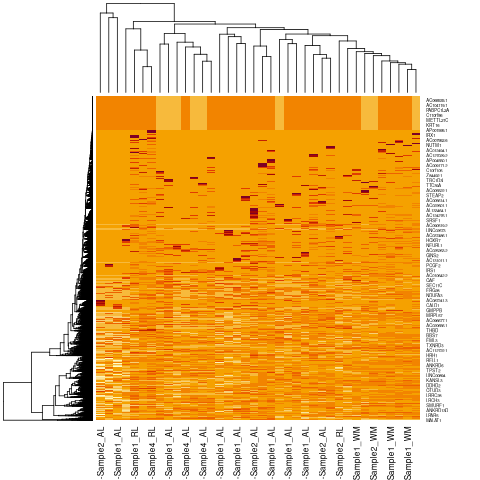

In [71]:
%%R
heatmap(lcpm)

In [72]:
%%R

# Load the CSV file generated by Python
gene_metadata <- read.csv("genes_for_heatmap_with_labels.csv")

dim(gene_metadata)

[1] 2792    2


In [73]:
%%R

# Subset lcpm to only the selected genes
lcpm_subset <- lcpm[rownames(lcpm) %in% gene_metadata$gene, ]

# Check the dimensions to confirm
dim(lcpm_subset)

[1] 2760   38


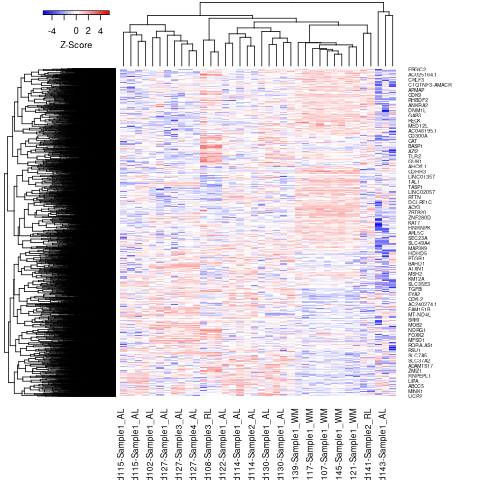

In [54]:
%%R
coolmap(lcpm_subset, margins=c(7,7), lhei=c(1,6), lwid=c(1,3))

In [98]:
%%R

# Find minimum and maximum values of lcpm_subset
min_value <- min(lcpm_subset)
max_value <- max(lcpm_subset)

# Print results
cat("Min value:", min_value, "\n")
cat("Max value:", max_value, "\n")

Min value: 1.959741 
Max value: 13.94738 


In [55]:
%%R

# Extract column names (sample names)
sample_names <- colnames(lcpm_subset)
sample_names

 [1] "Mg_A_Ind98-Sample2_WM"  "Mg_A_Ind107-Sample1_WM" "Mg_A_Ind117-Sample1_WM"
 [4] "Mg_A_Ind121-Sample1_WM" "Mg_A_Ind131-Sample1_WM" "Mg_A_Ind133-Sample1_WM"
 [7] "Mg_A_Ind139-Sample1_WM" "Mg_A_Ind140-Sample1_WM" "Mg_A_Ind145-Sample1_WM"
[10] "Mg_D_Ind113-Sample2_AL" "Mg_D_Ind114-Sample1_AL" "Mg_D_Ind114-Sample2_AL"
[13] "Mg_D_Ind115-Sample1_AL" "Mg_D_Ind115-Sample2_AL" "Mg_D_Ind122-Sample1_AL"
[16] "Mg_D_Ind127-Sample3_AL" "Mg_D_Ind127-Sample4_AL" "Mg_D_Ind130-Sample1_AL"
[19] "Mg_D_Ind130-Sample2_AL" "Mg_D_Ind143-Sample1_AL" "Mg_E_Ind102-Sample1_AL"
[22] "Mg_E_Ind103-Sample1_AL" "Mg_E_Ind106-Sample1_AL" "Mg_E_Ind114-Sample1_AL"
[25] "Mg_E_Ind114-Sample2_AL" "Mg_E_Ind115-Sample1_AL" "Mg_E_Ind115-Sample2_AL"
[28] "Mg_E_Ind122-Sample1_AL" "Mg_E_Ind127-Sample1_AL" "Mg_E_Ind127-Sample3_AL"
[31] "Mg_E_Ind127-Sample4_AL" "Mg_E_Ind130-Sample1_AL" "Mg_E_Ind130-Sample2_AL"
[34] "Mg_F_Ind108-Sample3_RL" "Mg_F_Ind108-Sample4_RL" "Mg_F_Ind134-Sample3_RL"
[37] "Mg_F_Ind141-Sample2_RL" "Mg_F_Ind1

In [56]:
%%R

# Create a data frame with sample names
metadata <- data.frame(sample = c(
    "Mg_A_Ind98-Sample2_WM", "Mg_A_Ind107-Sample1_WM", "Mg_A_Ind117-Sample1_WM",
    "Mg_A_Ind121-Sample1_WM", "Mg_A_Ind131-Sample1_WM", "Mg_A_Ind133-Sample1_WM",
    "Mg_A_Ind139-Sample1_WM", "Mg_A_Ind140-Sample1_WM", "Mg_A_Ind145-Sample1_WM",
    "Mg_D_Ind113-Sample2_AL", "Mg_D_Ind114-Sample1_AL", "Mg_D_Ind114-Sample2_AL",
    "Mg_D_Ind115-Sample1_AL", "Mg_D_Ind115-Sample2_AL", "Mg_D_Ind122-Sample1_AL",
    "Mg_D_Ind127-Sample3_AL", "Mg_D_Ind127-Sample4_AL", "Mg_D_Ind130-Sample1_AL",
    "Mg_D_Ind130-Sample2_AL", "Mg_D_Ind143-Sample1_AL", "Mg_E_Ind102-Sample1_AL",
    "Mg_E_Ind103-Sample1_AL", "Mg_E_Ind106-Sample1_AL", "Mg_E_Ind114-Sample1_AL",
    "Mg_E_Ind114-Sample2_AL", "Mg_E_Ind115-Sample1_AL", "Mg_E_Ind115-Sample2_AL",
    "Mg_E_Ind122-Sample1_AL", "Mg_E_Ind127-Sample1_AL", "Mg_E_Ind127-Sample3_AL",
    "Mg_E_Ind127-Sample4_AL", "Mg_E_Ind130-Sample1_AL", "Mg_E_Ind130-Sample2_AL",
    "Mg_F_Ind108-Sample3_RL", "Mg_F_Ind108-Sample4_RL", "Mg_F_Ind134-Sample3_RL",
    "Mg_F_Ind141-Sample2_RL", "Mg_F_Ind146-Sample1_RL"
))

# Extract Cell Type (Mg_A, Mg_D, Mg_E, Mg_F)
metadata$Cell_type <- sub("_Ind.*", "", metadata$sample)

# Extract Lesion Type (WM, AL, RL)
metadata$Lesion_Type <- sub(".*_", "", metadata$sample)

# Extract replicate information (Ind##-Sample#)
metadata$replicate <- sub(".*(Ind\\d+-Sample\\d+).*", "\\1", metadata$sample)

# Define factor levels for sorting
metadata$Lesion_Type <- factor(metadata$Lesion_Type, levels = c("WM", "AL", "RL"))
metadata$Cell_type <- factor(metadata$Cell_type, levels = c("Mg_A", "Mg_D", "Mg_E", "Mg_F"))

# Step 2: Create a new column that combines Cell Type and Lesion Type
metadata$order_column <- paste(metadata$Cell_type, metadata$Lesion_Type, sep = "_")
unique(metadata$order_column)

# Step 3: Define the exact desired order manually (you can fill this in)
custom_order <- c("Mg_A_WM", "Mg_D_AL", "Mg_E_AL", "Mg_F_RL"
    # Fill in your desired order here
)

# Step 4: Convert order_column to a factor with the predefined levels
metadata$order_column <- factor(metadata$order_column, levels = custom_order)

# Step 5: Reorder metadata based on this new column
ordered_cols <- metadata[order(metadata$order_column), ]

# Check output
head(ordered_cols)

                  sample Cell_type Lesion_Type      replicate order_column
1  Mg_A_Ind98-Sample2_WM      Mg_A          WM  Ind98-Sample2      Mg_A_WM
2 Mg_A_Ind107-Sample1_WM      Mg_A          WM Ind107-Sample1      Mg_A_WM
3 Mg_A_Ind117-Sample1_WM      Mg_A          WM Ind117-Sample1      Mg_A_WM
4 Mg_A_Ind121-Sample1_WM      Mg_A          WM Ind121-Sample1      Mg_A_WM
5 Mg_A_Ind131-Sample1_WM      Mg_A          WM Ind131-Sample1      Mg_A_WM
6 Mg_A_Ind133-Sample1_WM      Mg_A          WM Ind133-Sample1      Mg_A_WM


In [57]:
%%R
mat_scaled = t(apply(lcpm_subset, 1, scale))

# Find minimum and maximum values of lcpm_subset
min_value <- min(mat_scaled)
max_value <- max(mat_scaled)

# Print results
cat("Min value:", min_value, "\n")
cat("Max value:", max_value, "\n")

Min value: -5.475819 
Max value: 3.887221 


In [58]:
%%R

colnames(mat_scaled) <- colnames(lcpm_subset)
head(mat_scaled, 3)

       Mg_A_Ind98-Sample2_WM Mg_A_Ind107-Sample1_WM Mg_A_Ind117-Sample1_WM
SDF4               0.3211594              0.3490103              0.6150127
CCNL2              1.1779560              0.4623868              1.2180576
MRPL20             0.1939905              0.5055738              0.1446052
       Mg_A_Ind121-Sample1_WM Mg_A_Ind131-Sample1_WM Mg_A_Ind133-Sample1_WM
SDF4               -0.5517922              0.4712421              0.4431767
CCNL2               0.4191898              1.1511518              1.1871968
MRPL20              0.3563710             -0.1924115             -0.4946050
       Mg_A_Ind139-Sample1_WM Mg_A_Ind140-Sample1_WM Mg_A_Ind145-Sample1_WM
SDF4              -0.60033711             0.02367619              0.1494656
CCNL2              0.17971759             0.73878954              0.1621169
MRPL20            -0.07416677             0.32741568              0.1360934
       Mg_D_Ind113-Sample2_AL Mg_D_Ind114-Sample1_AL Mg_D_Ind114-Sample2_AL
SDF4            

In [59]:
%%R

# Compute the base mean expression per gene
base_mean <- rowMeans(lcpm_subset)

# Convert to a matrix for ComplexHeatmap
base_mean_matrix <- matrix(base_mean, ncol = 1)
rownames(base_mean_matrix) <- rownames(lcpm_subset)
colnames(base_mean_matrix) <- "Base Mean"

# Check structure
head(base_mean_matrix)

       Base Mean
SDF4    4.628524
CCNL2   6.030171
MRPL20  4.523923
NADK    5.322807
CFAP74  3.287261
FAAP20  4.427153


In [60]:
%%R

# Step 3: Reorder mat_scaled (columns) based on the ordered metadata
mat_scaled_ordered <- mat_scaled[, ordered_cols$sample]
colnames(mat_scaled_ordered)

 [1] "Mg_A_Ind98-Sample2_WM"  "Mg_A_Ind107-Sample1_WM" "Mg_A_Ind117-Sample1_WM"
 [4] "Mg_A_Ind121-Sample1_WM" "Mg_A_Ind131-Sample1_WM" "Mg_A_Ind133-Sample1_WM"
 [7] "Mg_A_Ind139-Sample1_WM" "Mg_A_Ind140-Sample1_WM" "Mg_A_Ind145-Sample1_WM"
[10] "Mg_D_Ind113-Sample2_AL" "Mg_D_Ind114-Sample1_AL" "Mg_D_Ind114-Sample2_AL"
[13] "Mg_D_Ind115-Sample1_AL" "Mg_D_Ind115-Sample2_AL" "Mg_D_Ind122-Sample1_AL"
[16] "Mg_D_Ind127-Sample3_AL" "Mg_D_Ind127-Sample4_AL" "Mg_D_Ind130-Sample1_AL"
[19] "Mg_D_Ind130-Sample2_AL" "Mg_D_Ind143-Sample1_AL" "Mg_E_Ind102-Sample1_AL"
[22] "Mg_E_Ind103-Sample1_AL" "Mg_E_Ind106-Sample1_AL" "Mg_E_Ind114-Sample1_AL"
[25] "Mg_E_Ind114-Sample2_AL" "Mg_E_Ind115-Sample1_AL" "Mg_E_Ind115-Sample2_AL"
[28] "Mg_E_Ind122-Sample1_AL" "Mg_E_Ind127-Sample1_AL" "Mg_E_Ind127-Sample3_AL"
[31] "Mg_E_Ind127-Sample4_AL" "Mg_E_Ind130-Sample1_AL" "Mg_E_Ind130-Sample2_AL"
[34] "Mg_F_Ind108-Sample3_RL" "Mg_F_Ind108-Sample4_RL" "Mg_F_Ind134-Sample3_RL"
[37] "Mg_F_Ind141-Sample2_RL" "Mg_F_Ind1

In [61]:
%%R
dim(gene_metadata)

[1] 2792    2


In [62]:
%%R
sum(duplicated(gene_metadata$gene))

[1] 32


In [107]:
%%R
gene_metadata <- gene_metadata[!duplicated(gene_metadata$gene), ]

In [108]:
%%R
dim(gene_metadata)

[1] 2760    2


In [109]:
%%R
unique(gene_metadata$category)

 [1] "Up_all"   "Up_DE"    "Up_DF"    "Up_EF"    "Up_D"     "Up_E"    
 [7] "Up_F"     "Down_F"   "Down_E"   "Down_D"   "Down_EF"  "Down_DF" 
[13] "Down_DE"  "Down_all"


In [132]:
%%R
table(gene_metadata$category)


Down_all   Down_D  Down_DE  Down_DF   Down_E  Down_EF   Down_F   Up_all 
     133      284      275       46      305       69      238      176 
    Up_D    Up_DE    Up_DF     Up_E    Up_EF     Up_F 
     243      230       70      268       37      386 


In [110]:
%%R
dim(mat_scaled)

[1] 2760   38


In [111]:
%%R

filtered_metadata <- gene_metadata[gene_metadata$gene %in% rownames(mat_scaled),]

# Ensure the categories are ordered correctly in the metadata
filtered_metadata$category <- factor(filtered_metadata$category, 
                                      levels = c("Up_all", "Up_DE", "Up_DF", "Up_EF", "Up_D", "Up_E", 
                                                 "Up_F", "Down_F", "Down_E", "Down_D", "Down_EF", "Down_DF", 
                                                 "Down_DE", "Down_all"))

dim(filtered_metadata)

[1] 2760    2


In [112]:
%%R

# Reorder genes based on the category column
ordered_genes <- filtered_metadata$gene[order(filtered_metadata$category)]

# Reorder mat_scaled and base_mean based on the ordered genes
mat_scaled_ordered <- mat_scaled_ordered[ordered_genes, ]
base_mean_ordered <- base_mean[ordered_genes]

In [113]:
%%R
head(ordered_cols)

                  sample Cell_type Lesion_Type      replicate order_column
1  Mg_A_Ind98-Sample2_WM      Mg_A          WM  Ind98-Sample2      Mg_A_WM
2 Mg_A_Ind107-Sample1_WM      Mg_A          WM Ind107-Sample1      Mg_A_WM
3 Mg_A_Ind117-Sample1_WM      Mg_A          WM Ind117-Sample1      Mg_A_WM
4 Mg_A_Ind121-Sample1_WM      Mg_A          WM Ind121-Sample1      Mg_A_WM
5 Mg_A_Ind131-Sample1_WM      Mg_A          WM Ind131-Sample1      Mg_A_WM
6 Mg_A_Ind133-Sample1_WM      Mg_A          WM Ind133-Sample1      Mg_A_WM


In [114]:
%%R

# Define colors for annotations
cell_type_colors <- c("Mg_D" = "#ff7f50", "Mg_E" = "#ffdca9", "Mg_F" = "#ffc776", "Mg_A" = "#e52b50")
lesion_colors <- c("WM" = "#e52b50", "AL" = "#f6ed84", "RL" = "#ddcd10")
replicate_colors <- colorRamp2(c(1, 4), c("white", "gray"))

# Step 5: Define gene type colors
gene_type_colors <- c(
    "Up_all" = "#4b0b1e", 
    "Up_DE" = "#8e1439", 
    "Up_DF" = "#ba1a4b", 
    "Up_EF" = "#d11d53",
    "Up_D" = "#e75480", 
    "Up_E" = "#ed80a2", 
    "Up_F" = "#f4b4c8",    
    "Down_F" = "#cecef4", 
    "Down_E" = "#8e8ee6", 
    "Down_D" = "#5353d9", 
    "Down_EF" = "#3737d1", 
    "Down_DF" = "#232399", 
    "Down_DE" = "#15155b", 
    "Down_all" = "#0b0b31"
)

In [121]:
%%R

# Ensure Treatment is a factor with LPC first
ordered_cols$Lesion_Type <- factor(ordered_cols$Lesion_Type, levels = c("WM", "AL", "RL"))

# Update the heatmap annotation to respect the new order
ha = HeatmapAnnotation(
    Cell_type = ordered_cols$Cell_type,
    Lesion_Type = ordered_cols$Lesion_Type,
    col = list(
        Cell_type = cell_type_colors,
        Lesion_Type = lesion_colors
    ),
    show_legend = FALSE,
    annotation_name_side = "right"
)

# Ensure Cell_type follows the correct order
ordered_cols$Cell_type <- factor(ordered_cols$Cell_type, levels = c("Mg_A", "Mg_D", "Mg_E", "Mg_F"))

# Create the Cell Type legend manually
lgd_cell_type <- Legend(
    title = "Cell Type",  # Change label
    at = c("Mg_A", "Mg_D", "Mg_E", "Mg_F"),  # Set order
    legend_gp = gpar(fill = cell_type_colors[c("Mg_A", "Mg_D", "Mg_E", "Mg_F")])  # Apply correct colors
)

# Capitalize first letter of condition labels
ordered_cols$Lesion_Type <- factor(ordered_cols$Lesion_Type, levels = c("WM", "AL", "RL"))

# Create the Cell Type legend manually
lgd_condition <- Legend(
    title = "Lesion Type",  # Change label
    at = c("WM", "AL", "RL"),  # Set order
    legend_gp = gpar(fill = lesion_colors[c("WM", "AL", "RL")])  # Apply correct colors
)

In [127]:
%%R

gene_annotation_ordered <- filtered_metadata$category[match(rownames(mat_scaled_ordered), filtered_metadata$gene)]

# Fix row annotation
row_ha = rowAnnotation(
    gene_type = anno_simple(as.character(gene_annotation_ordered), 
                            col = gene_type_colors, 
                            width = unit(8, "mm"))
)

# Create a heatmap legend for gene type
lgd_gene_type <- Legend(
    title = "Gene Type",
    at = names(gene_type_colors),  # Use category names
    legend_gp = gpar(fill = gene_type_colors)  # Apply colors
)

In [128]:
%%R

# Get the number of genes per category
gene_counts <- table(filtered_metadata$category)

# Compute cumulative positions for row splits
split_positions <- cumsum(as.numeric(gene_counts))

# Assign a row number-based split
gene_row_split <- cut(seq_len(nrow(mat_scaled_ordered)), 
                      breaks = c(0, split_positions), 
                      labels = names(gene_counts))

In [129]:
%%R
head(ordered_cols)

                  sample Cell_type Lesion_Type      replicate order_column
1  Mg_A_Ind98-Sample2_WM      Mg_A          WM  Ind98-Sample2      Mg_A_WM
2 Mg_A_Ind107-Sample1_WM      Mg_A          WM Ind107-Sample1      Mg_A_WM
3 Mg_A_Ind117-Sample1_WM      Mg_A          WM Ind117-Sample1      Mg_A_WM
4 Mg_A_Ind121-Sample1_WM      Mg_A          WM Ind121-Sample1      Mg_A_WM
5 Mg_A_Ind131-Sample1_WM      Mg_A          WM Ind131-Sample1      Mg_A_WM
6 Mg_A_Ind133-Sample1_WM      Mg_A          WM Ind133-Sample1      Mg_A_WM
  col_split
1    _Mg_A_
2    _Mg_A_
3    _Mg_A_
4    _Mg_A_
5    _Mg_A_
6    _Mg_A_


In [130]:
%%R
ordered_cols$col_split <- paste(ordered_cols$Treatment, ordered_cols$Cell_type, ordered_cols$Condition, sep = "_")
unique(ordered_cols$col_split)

[1] "_Mg_A_" "_Mg_D_" "_Mg_E_" "_Mg_F_"


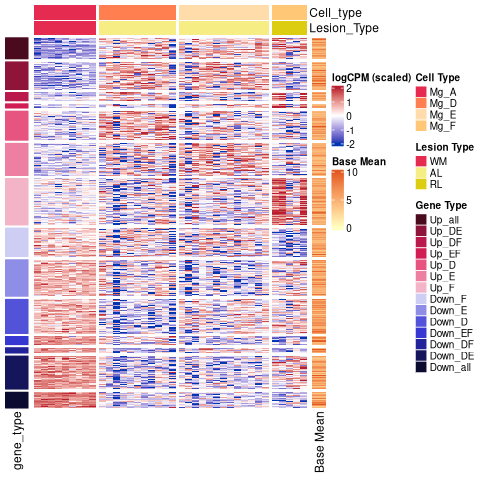

In [131]:
%%R

base_mean_colors <- colorRamp2(c(0, 10), c("#ffffc0", "#e25822"))

ht_list = row_ha +
Heatmap(mat_scaled_ordered, name = "logCPM (scaled)",
    col = colorRamp2(c(-2, 0, 2), c("#0036b4", "white", "#b81d32")),
    top_annotation = ha,
    row_order = filtered_metadata$gene,  # 🔹 Maintain order
    column_order = ordered_cols$sample,  # 🔹 Maintain order
    column_split = factor(ordered_cols$order_column, 
                          levels = unique(ordered_cols$order_column)),  # 🔹 Keep correct column split
    row_split = gene_row_split,  # 🔹 Manually defined row split
    cluster_column_slices= FALSE,
    cluster_row_slices = FALSE,
    show_column_names = FALSE,
    show_row_names = TRUE,   
    show_column_dend = FALSE,  
    show_row_dend = FALSE,     
    row_names_gp = gpar(fontsize = 8),
    column_title = NULL,  # 🔹 Remove column split labels
    row_title = NULL,      # 🔹 Remove row split labels
    use_raster = FALSE
) +
Heatmap(base_mean_ordered, name = "Base Mean",
    col = base_mean_colors,
    row_order = filtered_metadata$gene,
    row_split = gene_row_split,  # 🔹 Ensure matching row split
    cluster_row_slices = FALSE,
    width = unit(5, "mm"),
    show_row_names = FALSE,  
    row_names_gp = gpar(fontsize = 0),
    row_title = NULL  # 🔹 Remove row split labels
)

# Save as PNG
png("/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/DEG_analysis/Microglia/heatmap_output.png", width = 12, height = 10, units = "in", res = 300)
draw(ht_list, annotation_legend_list = list(lgd_cell_type, lgd_condition, lgd_gene_type))  
dev.off()  # Close the PNG device

# Display again in RStudio
draw(ht_list, annotation_legend_list = list(lgd_cell_type, lgd_condition, lgd_gene_type))

# NEW OVERLAPS- SUBSET PROPERLY

# Add ortho genes

In [25]:
# Read the CSV file
mart = pd.read_csv('/scratch365/eaboelno/scripts_sysVI_run/mart_export_unique.txt')

# Rename the columns
mart = mart.rename(columns={
    'Gene stable ID': 'eid_hs',
    'Gene name': 'gene_hs',
    'Mouse gene stable ID': 'eid_mm',
    'Mouse gene name': 'gene_mm'
})

# Optionally, display the first few rows to check the data
print(mart.head())

length_of_mart = len(mart)
print(f"The length of the mart DataFrame is: {length_of_mart}")

            eid_hs  gene_hs              eid_mm  gene_mm
0  ENSG00000198888   MT-ND1  ENSMUSG00000064341   mt-Nd1
1  ENSG00000198763   MT-ND2  ENSMUSG00000064345   mt-Nd2
2  ENSG00000198804   MT-CO1  ENSMUSG00000064351   mt-Co1
3  ENSG00000198712   MT-CO2  ENSMUSG00000064354   mt-Co2
4  ENSG00000228253  MT-ATP8  ENSMUSG00000064356  mt-Atp8
The length of the mart DataFrame is: 25768


In [26]:
# One to one orthologues - dont have same mm/hs gene in the table 2x
oto_orthologues=mart[~mart.duplicated('eid_mm',keep=False).values & 
               ~mart.duplicated('eid_hs',keep=False).values]

length_of_mart = len(oto_orthologues)
print(f"The length of the mart DataFrame is: {length_of_mart}")

The length of the mart DataFrame is: 17140


In [27]:
# Optionally, display the first few rows to check the data
print(oto_orthologues.head())

            eid_hs  gene_hs              eid_mm  gene_mm
0  ENSG00000198888   MT-ND1  ENSMUSG00000064341   mt-Nd1
1  ENSG00000198763   MT-ND2  ENSMUSG00000064345   mt-Nd2
2  ENSG00000198804   MT-CO1  ENSMUSG00000064351   mt-Co1
3  ENSG00000198712   MT-CO2  ENSMUSG00000064354   mt-Co2
4  ENSG00000228253  MT-ATP8  ENSMUSG00000064356  mt-Atp8


In [28]:
# Merge the dataframes
LPC_demyel_2 = LPC_demyel_2.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_mm',
                      how='left')

# Select only the desired columns and rename if necessary
LPC_demyel_2 = LPC_demyel_2[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
LPC_demyel_2['logFC'] = LPC_demyel_2['logFC'].astype(float)
LPC_demyel_2['Padj'] = LPC_demyel_2['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = LPC_demyel_2['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {LPC_demyel_2.shape}")
LPC_demyel_2 = LPC_demyel_2.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {LPC_demyel_2.shape}")

The number of NaN values in the 'gene_hs' column is: 1360
Shape with NaN: (9436, 9)
Shape after trimming: (8076, 9)


In [29]:
# Filter for upregulated genes
LPC_demyel_2_up = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC >= 0.585)]
print(LPC_demyel_2_up.shape)

# Filter for downregulated genes
LPC_demyel_2_down = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC <= -0.585)]
print(LPC_demyel_2_down.shape)

(1242, 9)
(3061, 9)


In [30]:
# Merge the dataframes
LPC_demyel = LPC_demyel.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_mm',
                      how='left')

# Select only the desired columns and rename if necessary
LPC_demyel = LPC_demyel[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
LPC_demyel['logFC'] = LPC_demyel['logFC'].astype(float)
LPC_demyel['Padj'] = LPC_demyel['Padj'].astype(float)


# Count NaN values in the 'gene_hs' column
num_nans = LPC_demyel['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {LPC_demyel.shape}")
LPC_demyel = LPC_demyel.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {LPC_demyel.shape}")

The number of NaN values in the 'gene_hs' column is: 1800
Shape with NaN: (10659, 9)
Shape after trimming: (8859, 9)


In [31]:
# Filter for upregulated genes
LPC_de_up = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC >= 0.585)]
print(LPC_de_up.shape)

# Filter for downregulated genes
LPC_de_down = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC <= -0.585)]
print(LPC_de_down.shape)

(950, 9)
(2238, 9)


In [32]:
# Merge the dataframes
LPC_remyel = LPC_remyel.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_mm',
                      how='left')

# Select only the desired columns and rename if necessary
LPC_remyel = LPC_remyel[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
LPC_remyel['logFC'] = LPC_remyel['logFC'].astype(float)
LPC_remyel['Padj'] = LPC_remyel['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = LPC_remyel['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {LPC_remyel.shape}")
LPC_remyel = LPC_remyel.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {LPC_remyel.shape}")

The number of NaN values in the 'gene_hs' column is: 1639
Shape with NaN: (10358, 9)
Shape after trimming: (8719, 9)


In [33]:
# Filter for upregulated genes
LPC_re_up = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC >= 0.585)]
print(LPC_re_up.shape)

# Filter for downregulated genes
LPC_re_down = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC <= -0.585)]
print(LPC_re_down.shape)

(607, 9)
(2131, 9)


In [34]:
# Merge the dataframes
Cupr_demyel = Cupr_demyel.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_mm',
                      how='left')

# Select only the desired columns and rename if necessary
Cupr_demyel = Cupr_demyel[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
Cupr_demyel['logFC'] = Cupr_demyel['logFC'].astype(float)
Cupr_demyel['Padj'] = Cupr_demyel['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = Cupr_demyel['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {Cupr_demyel.shape}")
Cupr_demyel = Cupr_demyel.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {Cupr_demyel.shape}")

The number of NaN values in the 'gene_hs' column is: 1506
Shape with NaN: (10148, 9)
Shape after trimming: (8642, 9)


In [35]:
# Filter for upregulated genes
Cupr_de_up = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC >= 0.585)]
print(Cupr_de_up.shape)

# Filter for downregulated genes
Cupr_de_down = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC <= -0.585)]
print(Cupr_de_down.shape)

(870, 9)
(3641, 9)


In [36]:
# Merge the dataframes
Cupr_remyel = Cupr_remyel.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_mm',
                      how='left')

# Select only the desired columns and rename if necessary
Cupr_remyel = Cupr_remyel[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B']]
Cupr_remyel['logFC'] = Cupr_remyel['logFC'].astype(float)
Cupr_remyel['Padj'] = Cupr_remyel['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = Cupr_remyel['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {Cupr_remyel.shape}")
Cupr_remyel = Cupr_remyel.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {Cupr_remyel.shape}")

The number of NaN values in the 'gene_hs' column is: 1241
Shape with NaN: (9300, 9)
Shape after trimming: (8059, 9)


In [37]:
# Filter for upregulated genes
Cupr_re_up = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC >= 0.585)]
print(Cupr_re_up.shape)

# Filter for downregulated genes
Cupr_re_down = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC <= -0.585)]
print(Cupr_re_down.shape)

(327, 9)
(888, 9)


In [38]:
Mg_hs_d[:5]

,gene,logFC,AveExpr,t,Pvalue,Padj,B,z.std,gene.1
0,MYO1E,3.663872,9.429126,-15.185077,6.851893e-13,3.117062e-09,19.478874,-7.182359,MYO1E
1,IL6ST,-2.269453,8.269909,15.180076,6.896154e-13,3.117062e-09,19.408673,7.181478,IL6ST
2,ABCC4,-2.112693,9.257283,13.787137,4.456471e-12,1.342883e-08,17.707020,6.921893,ABCC4
3,BLNK,-1.892693,8.376377,12.966488,1.439085e-11,3.252332e-08,16.584543,6.753915,BLNK
4,ST6GALNAC3,-3.418599,9.508784,12.256273,4.164442e-11,7.529310e-08,15.546988,6.598106,ST6GALNAC3


In [39]:
# Merge the dataframes
Mg_hs_d = Mg_hs_d.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_hs',
                      how='left')

Mg_hs_d[:5]

,gene,logFC,AveExpr,t,Pvalue,Padj,B,z.std,gene.1,eid_hs,gene_hs,eid_mm,gene_mm
0,MYO1E,3.663872,9.429126,-15.185077,6.851893e-13,3.117062e-09,19.478874,-7.182359,MYO1E,ENSG00000157483,MYO1E,ENSMUSG00000032220,Myo1e
1,IL6ST,-2.269453,8.269909,15.180076,6.896154e-13,3.117062e-09,19.408673,7.181478,IL6ST,ENSG00000134352,IL6ST,ENSMUSG00000021756,Il6st
2,ABCC4,-2.112693,9.257283,13.787137,4.456471e-12,1.342883e-08,17.707020,6.921893,ABCC4,ENSG00000125257,ABCC4,ENSMUSG00000032849,Abcc4
3,BLNK,-1.892693,8.376377,12.966488,1.439085e-11,3.252332e-08,16.584543,6.753915,BLNK,ENSG00000095585,BLNK,ENSMUSG00000061132,Blnk
4,ST6GALNAC3,-3.418599,9.508784,12.256273,4.164442e-11,7.529310e-08,15.546988,6.598106,ST6GALNAC3,ENSG00000184005,ST6GALNAC3,ENSMUSG00000052544,St6galnac3


In [40]:
# Select only the desired columns and rename if necessary
Mg_hs_d = Mg_hs_d[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B', 'z.std']]
Mg_hs_d['logFC'] = Mg_hs_d['logFC'].astype(float)
Mg_hs_d['Padj'] = Mg_hs_d['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = Mg_hs_d['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {Mg_hs_d.shape}")
Mg_hs_d = Mg_hs_d.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {Mg_hs_d.shape}")

The number of NaN values in the 'gene_hs' column is: 1674
Shape with NaN: (9040, 10)
Shape after trimming: (7366, 10)


In [41]:
# Filter for upregulated genes
Mg_hs_d_up = Mg_hs_d[(Mg_hs_d.Padj < 0.05) & (Mg_hs_d.logFC >= 0.585)]
print(Mg_hs_d_up.shape)

# Filter for downregulated genes
Mg_hs_d_down = Mg_hs_d[(Mg_hs_d.Padj < 0.05) & (Mg_hs_d.logFC <= -0.585)]
print(Mg_hs_d_down.shape)

(855, 10)
(609, 10)


In [42]:
# Merge the dataframes
Mg_hs_e_up = Mg_hs_e_up.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_hs',
                      how='left')

# Select only the desired columns and rename if necessary
Mg_hs_e_up = Mg_hs_e_up[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B', 'z.std']]
Mg_hs_e_up['logFC'] = Mg_hs_e_up['logFC'].astype(float)
Mg_hs_e_up['Padj'] = Mg_hs_e_up['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = Mg_hs_e_up['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {Mg_hs_e_up.shape}")
Mg_hs_e_up = Mg_hs_e_up.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {Mg_hs_e_up.shape}")

The number of NaN values in the 'gene_hs' column is: 183
Shape with NaN: (932, 10)
Shape after trimming: (749, 10)


In [43]:
# Filter for upregulated genes
Mg_hs_e_up = Mg_hs_e[(Mg_hs_e.Padj < 0.05) & (Mg_hs_e.logFC >= 0.585)]
print(Mg_hs_e_up.shape)

# Filter for downregulated genes
Mg_hs_e_down = Mg_hs_e[(Mg_hs_e.Padj < 0.05) & (Mg_hs_e.logFC <= -0.585)]
print(Mg_hs_e_down.shape)

(932, 9)
(817, 9)


In [44]:
# Merge the dataframes
Mg_hs_f_up = Mg_hs_f_up.merge(oto_orthologues,
                      left_on='gene',
                      right_on='gene_hs',
                      how='left')

# Select only the desired columns and rename if necessary
Mg_hs_f_up = Mg_hs_f_up[['gene', 'gene_hs', 'gene_mm', 'logFC', 'AveExpr', 't', 'Pvalue', 'Padj', 'B', 'z.std']]
Mg_hs_f_up['logFC'] = Mg_hs_f_up['logFC'].astype(float)
Mg_hs_f_up['Padj'] = Mg_hs_f_up['Padj'].astype(float)

# Count NaN values in the 'gene_hs' column
num_nans = Mg_hs_f_up['gene_hs'].isna().sum()
print(f"The number of NaN values in the 'gene_hs' column is: {num_nans}")

# Drop rows where 'gene_hs' is NaN
print(f"Shape with NaN: {Mg_hs_f_up.shape}")
Mg_hs_f_up = Mg_hs_f_up.dropna(subset=['gene_hs'])
print(f"Shape after trimming: {Mg_hs_f_up.shape}")

The number of NaN values in the 'gene_hs' column is: 224
Shape with NaN: (986, 10)
Shape after trimming: (762, 10)


In [45]:
# Filter for upregulated genes
Mg_hs_f_up = Mg_hs_f[(Mg_hs_f.Padj < 0.05) & (Mg_hs_f.logFC >= 0.585)]
print(Mg_hs_f_up.shape)

# Filter for downregulated genes
Mg_hs_f_down = Mg_hs_f[(Mg_hs_f.Padj < 0.05) & (Mg_hs_f.logFC <= -0.585)]
print(Mg_hs_f_down.shape)

(986, 9)
(587, 9)


## Subset gene lists-- sep cupr and lpc

In [51]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_cupr = set(Mg_hs_d['gene']) & \
                set(Mg_hs_e['gene']) & \
                set(Mg_hs_f['gene']) & \
                set(Cupr_demyel['gene_hs']) & \
                set(Cupr_remyel['gene_hs'])

len(genes_all_cupr)

5408

In [52]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_lpc = set(Mg_hs_d['gene']) & \
                set(Mg_hs_e['gene']) & \
                set(Mg_hs_f['gene']) & \
                set(LPC_demyel_2['gene_hs']) & \
                set(LPC_demyel['gene_hs']) & \
                set(LPC_remyel['gene_hs'])

len(genes_all_lpc)

5398

In [55]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_cupr)]

# Apply filtering to each DEG DataFrame
Mg_hs_d_cupr = filter_genes(Mg_hs_d)
Mg_hs_e_cupr = filter_genes(Mg_hs_e)
Mg_hs_f_cupr = filter_genes(Mg_hs_f)

print(Mg_hs_d_cupr.shape)
print(Mg_hs_e_cupr.shape)
print(Mg_hs_f_cupr.shape)

(5408, 10)
(5408, 9)
(5408, 9)


In [56]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_lpc)]

# Apply filtering to each DEG DataFrame
Mg_hs_d_lpc = filter_genes(Mg_hs_d)
Mg_hs_e_lpc = filter_genes(Mg_hs_e)
Mg_hs_f_lpc = filter_genes(Mg_hs_f)

print(Mg_hs_d_lpc.shape)
print(Mg_hs_e_lpc.shape)
print(Mg_hs_f_lpc.shape)

(5398, 10)
(5398, 9)
(5398, 9)


In [59]:
genes_Mg_hs_d_cupr = Mg_hs_d_cupr['gene'].tolist()
set_Mg_hs_d_cupr = set(genes_Mg_hs_d_cupr)

genes_Mg_hs_d_lpc = Mg_hs_d_lpc['gene'].tolist()
set_Mg_hs_d_lpc = set(genes_Mg_hs_d_lpc)

overlap_lpc_cupr = set_Mg_hs_d_cupr & set_Mg_hs_d_lpc
print("Number of overlapping genes:", len(overlap_lpc_cupr))
#print("Overlapping genes:", overlap_AL_lpc_cupr)

Number of overlapping genes: 5215


In [60]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene_hs'].isin(genes_all_cupr)]

# Apply filtering to each DEG DataFrame
Cupr_demyel = filter_genes(Cupr_demyel)
Cupr_remyel = filter_genes(Cupr_remyel)

print(Cupr_demyel.shape)
print(Cupr_remyel.shape)

(5408, 9)
(5408, 9)


In [61]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene_hs'].isin(genes_all_lpc)]

# Apply filtering to each DEG DataFrame
LPC_demyel_2 = filter_genes(LPC_demyel_2)
LPC_demyel = filter_genes(LPC_demyel)
LPC_remyel = filter_genes(LPC_remyel)

print(LPC_demyel_2.shape)
print(LPC_demyel.shape)
print(LPC_remyel.shape)

(5398, 9)
(5398, 9)
(5398, 9)


In [ ]:
print(Mg_hs_d_cupr.shape)
print(Mg_hs_e_cupr.shape)
print(Mg_hs_f_cupr.shape)

print(Mg_hs_d_lpc.shape)
print(Mg_hs_e_lpc.shape)
print(Mg_hs_f_lpc.shape)

In [63]:
# Filter for upregulated genes, human
Mg_hs_d_cupr_up = Mg_hs_d_cupr[(Mg_hs_d_cupr.Padj < 0.05) & (Mg_hs_d_cupr.logFC >= 0.585)]
print(Mg_hs_d_cupr_up.shape)

Mg_hs_e_cupr_up = Mg_hs_e_cupr[(Mg_hs_e_cupr.Padj < 0.05) & (Mg_hs_e_cupr.logFC >= 0.585)]
print(Mg_hs_e_cupr_up.shape)

Mg_hs_f_cupr_up = Mg_hs_f_cupr[(Mg_hs_f_cupr.Padj < 0.05) & (Mg_hs_f_cupr.logFC >= 0.585)]
print(Mg_hs_f_cupr_up.shape)

# Filter for upregulated genes
Mg_hs_d_lpc_up = Mg_hs_d_lpc[(Mg_hs_d_lpc.Padj < 0.05) & (Mg_hs_d_lpc.logFC >= 0.585)]
print(Mg_hs_d_lpc_up.shape)

Mg_hs_e_lpc_up = Mg_hs_e_lpc[(Mg_hs_e_lpc.Padj < 0.05) & (Mg_hs_e_lpc.logFC >= 0.585)]
print(Mg_hs_e_lpc_up.shape)

Mg_hs_f_lpc_up = Mg_hs_f_lpc[(Mg_hs_f_lpc.Padj < 0.05) & (Mg_hs_f_lpc.logFC >= 0.585)]
print(Mg_hs_f_lpc_up.shape)

(482, 10)
(421, 9)
(470, 9)
(480, 10)
(421, 9)
(467, 9)


In [66]:
# Filter for downregulated genes, human (Cuprizone)
Mg_hs_d_cupr_down = Mg_hs_d_cupr[(Mg_hs_d_cupr.Padj < 0.05) & (Mg_hs_d_cupr.logFC <= -0.585)]
print(Mg_hs_d_cupr_down.shape)

Mg_hs_e_cupr_down = Mg_hs_e_cupr[(Mg_hs_e_cupr.Padj < 0.05) & (Mg_hs_e_cupr.logFC <= -0.585)]
print(Mg_hs_e_cupr_down.shape)

Mg_hs_f_cupr_down = Mg_hs_f_cupr[(Mg_hs_f_cupr.Padj < 0.05) & (Mg_hs_f_cupr.logFC <= -0.585)]
print(Mg_hs_f_cupr_down.shape)

# Filter for downregulated genes (LPC conditions)
Mg_hs_d_lpc_down = Mg_hs_d_lpc[(Mg_hs_d_lpc.Padj < 0.05) & (Mg_hs_d_lpc.logFC <= -0.585)]
print(Mg_hs_d_lpc_down.shape)

Mg_hs_e_lpc_down = Mg_hs_e_lpc[(Mg_hs_e_lpc.Padj < 0.05) & (Mg_hs_e_lpc.logFC <= -0.585)]
print(Mg_hs_e_lpc_down.shape)

Mg_hs_f_lpc_down = Mg_hs_f_lpc[(Mg_hs_f_lpc.Padj < 0.05) & (Mg_hs_f_lpc.logFC <= -0.585)]
print(Mg_hs_f_lpc_down.shape)

(461, 10)
(500, 9)
(262, 9)
(466, 10)
(491, 9)
(257, 9)


In [67]:
# Filter upregulated genes, mouse

LPC_demyel_2_up = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC >= 0.585)]
print(LPC_demyel_2_up.shape)

LPC_demyel_up = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC >= 0.585)]
print(LPC_demyel_up.shape)

LPC_remyel_up = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC >= 0.585)]
print(LPC_remyel_up.shape)

Cupr_demyel_up = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC >= 0.585)]
print(Cupr_demyel_up.shape)

Cupr_remyel_up = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC >= 0.585)]
print(Cupr_remyel_up.shape)

(652, 9)
(542, 9)
(322, 9)
(423, 9)
(195, 9)


In [71]:
# Filter for downregulated genes
LPC_demyel_2_down = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC <= -0.585)]
print(LPC_demyel_2_down.shape)

LPC_demyel_down = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC <= -0.585)]
print(LPC_demyel_down.shape)

LPC_remyel_down = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC <= -0.585)]
print(LPC_remyel_down.shape)

Cupr_demyel_down = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC <= -0.585)]
print(Cupr_demyel_down.shape)

Cupr_remyel_down = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC <= -0.585)]
print(Cupr_remyel_down.shape)

(2296, 9)
(1628, 9)
(1569, 9)
(2418, 9)
(604, 9)


# Upset plots

In [74]:
from upsetplot import plot
from upsetplot import from_contents
from upsetplot import UpSet

In [68]:
# Create gene lists from the new DataFrames
genes_LPC_demyel_2_up = LPC_demyel_2_up['gene_hs'].tolist()
genes_LPC_de_up = LPC_demyel_up['gene_hs'].tolist()
genes_LPC_re_up = LPC_remyel_up['gene_hs'].tolist()
genes_Cupr_de_up = Cupr_demyel_up['gene_hs'].tolist()
genes_Cupr_re_up = Cupr_remyel_up['gene_hs'].tolist()

genes_Mg_hs_d_cupr_up = Mg_hs_d_cupr_up['gene'].tolist()
genes_Mg_hs_e_cupr_up = Mg_hs_e_cupr_up['gene'].tolist()
genes_Mg_hs_f_cupr_up = Mg_hs_f_cupr_up['gene'].tolist()

genes_Mg_hs_d_lpc_up = Mg_hs_d_lpc_up['gene'].tolist()
genes_Mg_hs_e_lpc_up = Mg_hs_e_lpc_up['gene'].tolist()
genes_Mg_hs_f_lpc_up = Mg_hs_f_lpc_up['gene'].tolist()

In [75]:
# Create DataFrames for each gene list
# Define the function to create a DataFrame
def create_gene_df(genes_list, column_name):
    return pd.DataFrame(genes_list, columns=[column_name])

# Create DataFrames for each gene list
LPC_demyel_2_up_df = create_gene_df(genes_LPC_demyel_2_up, 'LPC_de2_up')
LPC_de_up_df = create_gene_df(genes_LPC_de_up, 'LPC_de_up')
LPC_re_up_df = create_gene_df(genes_LPC_re_up, 'LPC_re_up')
Cupr_de_up_df = create_gene_df(genes_Cupr_de_up, 'Cupr_de_up')
Cupr_re_up_df = create_gene_df(genes_Cupr_re_up, 'Cupr_re_up')

Mg_hs_d_cupr_up_df = create_gene_df(genes_Mg_hs_d_cupr_up, 'hs_d_cupr_up')
Mg_hs_e_cupr_up_df = create_gene_df(genes_Mg_hs_e_cupr_up, 'hs_e_cupr_up')
Mg_hs_f_cupr_up_df = create_gene_df(genes_Mg_hs_f_cupr_up, 'hs_f_cupr_up')

Mg_hs_d_lpc_up_df = create_gene_df(genes_Mg_hs_d_lpc_up, 'hs_d_lpc_up')
Mg_hs_e_lpc_up_df = create_gene_df(genes_Mg_hs_e_lpc_up, 'hs_e_lpc_up')
Mg_hs_f_lpc_up_df = create_gene_df(genes_Mg_hs_f_lpc_up, 'hs_f_lpc_up')

In [76]:
# Create DataFrames for each gene list using the new gene lists
LPC_de2_up_df = pd.DataFrame({'LPC_de2_up': True, 'Name': genes_LPC_demyel_2_up})
LPC_de_up_df = pd.DataFrame({'LPC_de_up': True, 'Name': genes_LPC_de_up})
LPC_re_up_df = pd.DataFrame({'LPC_re_up': True, 'Name': genes_LPC_re_up})
Cupr_de_up_df = pd.DataFrame({'Cupr_de_up': True, 'Name': genes_Cupr_de_up})
Cupr_re_up_df = pd.DataFrame({'Cupr_re_up': True, 'Name': genes_Cupr_re_up})

Mg_hs_d_cupr_up_df = pd.DataFrame({'hs_d_cupr_up': True, 'Name': genes_Mg_hs_d_cupr_up})
Mg_hs_e_cupr_up_df = pd.DataFrame({'hs_e_cupr_up': True, 'Name': genes_Mg_hs_e_cupr_up})
Mg_hs_f_cupr_up_df = pd.DataFrame({'hs_f_cupr_up': True, 'Name': genes_Mg_hs_f_cupr_up})

Mg_hs_d_lpc_up_df = pd.DataFrame({'hs_d_lpc_up': True, 'Name': genes_Mg_hs_d_lpc_up})
Mg_hs_e_lpc_up_df = pd.DataFrame({'hs_e_lpc_up': True, 'Name': genes_Mg_hs_e_lpc_up})
Mg_hs_f_lpc_up_df = pd.DataFrame({'hs_f_lpc_up': True, 'Name': genes_Mg_hs_f_lpc_up})

## Cupr and LPC separately- no BAMs?

In [77]:
# Merge all the DataFrames hierarchically

# TAKE OUT BAMS

up_df = LPC_de_up_df.merge(
    LPC_re_up_df.merge(
        Mg_hs_d_lpc_up_df.merge(
            Mg_hs_e_lpc_up_df.merge(
                Mg_hs_f_lpc_up_df, on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
up_df = up_df.fillna(False)

# Set index for the data frame
up_df_plot = up_df.set_index([
    'LPC_de_up', 'LPC_re_up', 'hs_d_lpc_up', 'hs_e_lpc_up', 'hs_f_lpc_up'
])

# Print the merged DataFrame
print("Upregulated genes DataFrame:")
print(up_df_plot)

Upregulated genes DataFrame:
                                                           Name
LPC_de_up LPC_re_up hs_d_lpc_up hs_e_lpc_up hs_f_lpc_up        
True      True      True        True        True          ABCA1
False     False     False       True        False         ABCA3
                                            False         ABCA7
                    True        True        True          ABCC3
                                            False         ABCC5
...                                                         ...
                    False       True        False        ZNF318
                                False       True         ZNF395
                                            True         ZNF445
                                            True          ZNRF1
                    True        False       False           ZYX

[1378 rows x 1 columns]


/tmp/1211519.1.gpu/ipykernel_15381/2672519329.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  up_df = up_df.fillna(False)


In [78]:
# Dictionary to map old index names to new index names
index_name_map = {
    #'LPC_de2_up': 'LPC_demyel_BAMs',
    'LPC_de_up': 'LPC_demyel_DAMs',
    'LPC_re_up': 'LPC_remyel_DAMs',
    'hs_d_lpc_up': 'hs_Mg_D',
    'hs_e_lpc_up': 'hs_Mg_E',
    'hs_f_lpc_up': 'hs_Mg_F',
}

# Rename the index levels using the dictionary
up_df_plot.index = up_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(up_df_plot)

Updated Upregulated genes DataFrame:
                                                           Name
LPC_demyel_DAMs LPC_remyel_DAMs hs_Mg_D hs_Mg_E hs_Mg_F        
True            True            True    True    True      ABCA1
False           False           False   True    False     ABCA3
                                                False     ABCA7
                                True    True    True      ABCC3
                                                False     ABCC5
...                                                         ...
                                False   True    False    ZNF318
                                        False   True     ZNF395
                                                True     ZNF445
                                                True      ZNRF1
                                True    False   False       ZYX

[1378 rows x 1 columns]


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

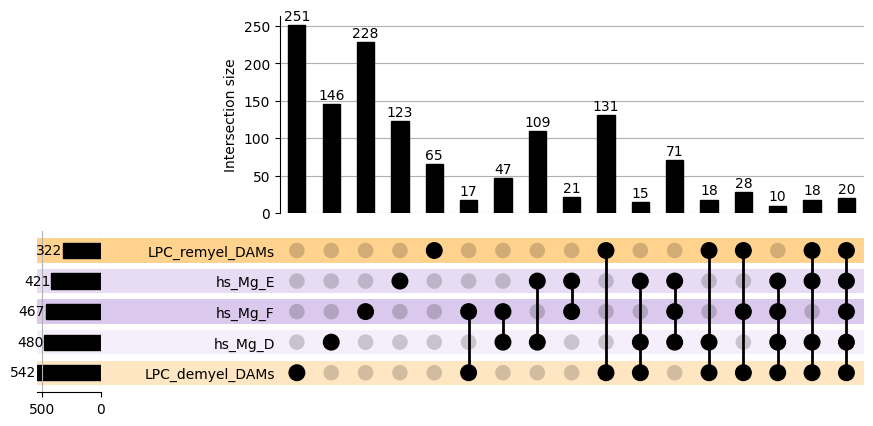

In [101]:
# Create UpSet plot
upset = UpSet(up_df_plot, subset_size='count', show_counts=True, facecolor="black", 
              min_degree=1, min_subset_size=10, max_subset_size=5000)
        
# Style the subsets
upset.style_categories(
    'LPC_demyel_BAMs',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_DAMs',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_DAMs',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_D',
    shading_facecolor="#f4effa",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_E',
    shading_facecolor="#e7dcf3",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_F',
    shading_facecolor="#dac9ec",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/MG_upset_plot_LPC_up_n10_overlapping.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

## Now Cupr

In [80]:
# Merge all the DataFrames hierarchically
up_df2 = Cupr_de_up_df.merge(
    Cupr_re_up_df.merge(
        Mg_hs_d_cupr_up_df.merge(
            Mg_hs_e_cupr_up_df.merge(
                Mg_hs_f_cupr_up_df, on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
up_df2 = up_df2.fillna(False)

# Set index for the data frame
up_df2_plot = up_df2.set_index([
    'Cupr_de_up', 'Cupr_re_up', 'hs_d_cupr_up', 'hs_e_cupr_up', 'hs_f_cupr_up'
])

# Print the merged DataFrame
print("Upregulated genes DataFrame:")
print(up_df2_plot)

Upregulated genes DataFrame:
                                                                Name
Cupr_de_up Cupr_re_up hs_d_cupr_up hs_e_cupr_up hs_f_cupr_up        
True       True       True         True         True           ABCA1
False      False      False        True         False          ABCA3
True       False      False        True         False          ABCA7
False      False      True         True         True           ABCC3
                                                False          ABCC5
...                                                              ...
                      False        True         False         ZNF318
                                   False        True          ZNF395
                                                True          ZNF445
                                                True           ZNRF1
                      True         False        False            ZYX

[1198 rows x 1 columns]


/tmp/1211519.1.gpu/ipykernel_15381/1638048897.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  up_df2 = up_df2.fillna(False)


In [81]:
# Dictionary to map old index names to new index names
index_name_map = {
    'Cupr_de_up': 'Cupr_demyel_DAMs',
    'Cupr_re_up': 'Cupr_remyel_DAMs',
    'hs_d_cupr_up': 'hs_Mg_D',
    'hs_e_cupr_up': 'hs_Mg_E',
    'hs_f_cupr_up': 'hs_Mg_F',
}

# Rename the index levels using the dictionary
up_df2_plot.index = up_df2_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(up_df_plot)

Updated Upregulated genes DataFrame:
                                                           Name
LPC_demyel_DAMs LPC_remyel_DAMs hs_Mg_D hs_Mg_E hs_Mg_F        
True            True            True    True    True      ABCA1
False           False           False   True    False     ABCA3
                                                False     ABCA7
                                True    True    True      ABCC3
                                                False     ABCC5
...                                                         ...
                                False   True    False    ZNF318
                                        False   True     ZNF395
                                                True     ZNF445
                                                True      ZNRF1
                                True    False   False       ZYX

[1378 rows x 1 columns]


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

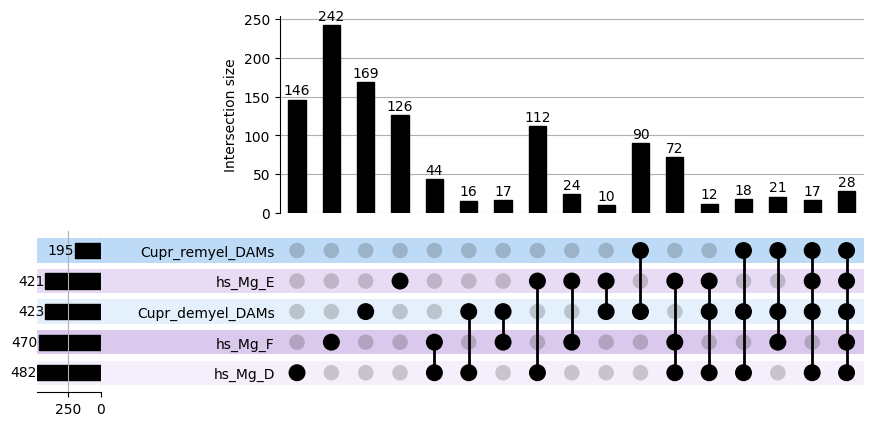

In [100]:
# Create UpSet plot
upset = UpSet(up_df2_plot, subset_size='count', show_counts=True, facecolor="black", 
              min_degree=1, min_subset_size=10)
        
# Style the subsets
upset.style_categories(
    'Cupr_demyel_DAMs',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_DAMs',
    shading_facecolor="#bddbf6",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_D',
    shading_facecolor="#f4effa",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_E',
    shading_facecolor="#e7dcf3",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_F',
    shading_facecolor="#dac9ec",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/MG_upset_plot_Cupr_up_n10_overlapping.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

## Look for overlaps

In [69]:
# Convert lists to sets for upregulated genes
set_LPC_demyel_2_up = set(genes_LPC_demyel_2_up)
set_LPC_de_up = set(genes_LPC_de_up)
set_LPC_re_up = set(genes_LPC_re_up)
set_Cupr_de_up = set(genes_Cupr_de_up)
set_Cupr_re_up = set(genes_Cupr_re_up)

set_Mg_hs_d_cupr_up = set(genes_Mg_hs_d_cupr_up)
set_Mg_hs_e_cupr_up = set(genes_Mg_hs_e_cupr_up)
set_Mg_hs_f_cupr_up = set(genes_Mg_hs_f_cupr_up)

set_Mg_hs_d_lpc_up = set(genes_Mg_hs_d_lpc_up)
set_Mg_hs_e_lpc_up = set(genes_Mg_hs_e_lpc_up)
set_Mg_hs_f_lpc_up = set(genes_Mg_hs_f_lpc_up)

In [83]:
# Overlap of upregulated genes
overlap_lpc = set_LPC_de_up & set_LPC_re_up & set_Mg_hs_d_lpc_up & set_Mg_hs_e_lpc_up & set_Mg_hs_f_lpc_up
print("Number of overlapping upregulated genes:", len(overlap_lpc))
print("Overlapping upregulated genes:", overlap_lpc)

Number of overlapping upregulated genes: 20
Overlapping upregulated genes: {'ANXA2', 'LPL', 'GPNMB', 'TRPS1', 'PTGER4', 'IQGAP1', 'SH3PXD2B', 'PLIN2', 'PLXNC1', 'ABCA1', 'SASH1', 'RAP2B', 'PKM', 'TSPO', 'COLEC12', 'APOE', 'CD9', 'PLA2G7', 'SLC31A2', 'APOC1'}


In [87]:
subset_df = Mg_hs_d[Mg_hs_d['gene'].isin(overlap_lpc)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene  gene_hs  gene_mm     logFC   AveExpr          t        Pvalue  \
19       LPL      LPL      Lpl  6.305634  5.514095 -10.375745  8.875418e-10   
89   COLEC12  COLEC12  Colec12  5.464393  3.635812  -7.830885  1.169214e-07   
226    SASH1    SASH1    Sash1  5.187168  4.811844  -6.194668  4.164857e-06   
45     ANXA2    ANXA2    Anxa2  4.241263  4.954328  -8.975735  1.112592e-08   
50     GPNMB    GPNMB    Gpnmb  4.002144  6.448719 -10.052676  1.318467e-08   

             Padj          B     z.std  
19   4.011689e-07   9.425658 -6.128423  
89   1.172260e-05   6.019223 -5.298244  
226  1.658604e-04   2.874062 -4.602981  
45   2.181456e-06  10.135583 -5.712606  
50   2.337048e-06   7.835990 -5.683654  
LPL, COLEC12, SASH1, ANXA2, GPNMB, PLXNC1, PLIN2, APOC1, PTGER4, ABCA1, CD9, SH3PXD2B, IQGAP1, SLC31A2, RAP2B, APOE, PKM, PLA2G7, TSPO, TRPS1


In [88]:
subset_df = Mg_hs_e[Mg_hs_e['gene'].isin(overlap_lpc)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene     logFC   AveExpr          t        Pvalue          Padj  \
21     GPNMB  5.097024  7.143696 -11.251138  2.732018e-10  1.092641e-07   
405  COLEC12  5.080160  3.548547  -5.299306  2.655174e-05  5.818493e-04   
19    PLXNC1  4.585865  5.536396 -10.606550  2.501961e-10  1.069934e-07   
49       LPL  4.584679  4.669207  -9.019157  7.216667e-09  1.281773e-06   
188    SASH1  4.465579  4.348569  -6.675854  9.742268e-07  4.586083e-05   

             B     z.std   gene.1  
21    7.960990 -6.313269    GPNMB  
405   1.154303 -4.201188  COLEC12  
19   10.145800 -6.326863   PLXNC1  
49    6.695868 -5.785803      LPL  
188   4.539790 -4.896774    SASH1  
GPNMB, COLEC12, PLXNC1, LPL, SASH1, SH3PXD2B, PLIN2, ANXA2, ABCA1, APOC1, RAP2B, IQGAP1, CD9, SLC31A2, APOE, PLA2G7, TSPO, PTGER4, PKM, TRPS1


In [89]:
subset_df = Mg_hs_f[Mg_hs_f['gene'].isin(overlap_lpc)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

          gene     logFC   AveExpr          t        Pvalue      Padj  \
172      PLIN2  5.245823  4.220071  -8.201693  4.614140e-05  0.002702   
0       PLXNC1  4.977773  4.649426 -16.255692  2.048165e-10  0.000002   
1301  SH3PXD2B  3.632911  3.365152  -4.053868  4.720837e-03  0.036791   
169      GPNMB  3.424563  5.473420  -6.690202  4.319098e-05  0.002583   
261    COLEC12  3.360110  1.797552  -5.886646  1.148953e-04  0.004459   

              B     z.std    gene.1  
172    4.883059 -4.074358     PLIN2  
0     14.083097 -6.357685    PLXNC1  
1301  -1.718865 -2.825490  SH3PXD2B  
169    0.361948 -4.089712     GPNMB  
261   -2.295240 -3.856770   COLEC12  
PLIN2, PLXNC1, SH3PXD2B, GPNMB, COLEC12, APOE, CD9, APOC1, SASH1, LPL, PKM, IQGAP1, PLA2G7, PTGER4, ANXA2, ABCA1, TRPS1, RAP2B, TSPO, SLC31A2


In [90]:
# Overlap of upregulated genes
overlap_cupr = set_Cupr_de_up & set_Cupr_re_up & set_Mg_hs_d_cupr_up & set_Mg_hs_e_cupr_up & set_Mg_hs_f_cupr_up
print("Number of overlapping upregulated genes:", len(overlap_cupr))
print("Overlapping upregulated genes:", overlap_cupr)

Number of overlapping upregulated genes: 28
Overlapping upregulated genes: {'ANXA2', 'LPL', 'GPNMB', 'METRNL', 'SDC3', 'RRAGD', 'TRPS1', 'PTGER4', 'NFIL3', 'GADD45B', 'IQGAP1', 'ITGA4', 'SH3PXD2B', 'PLAUR', 'PLIN2', 'PLXNC1', 'RAB20', 'ABCA1', 'SASH1', 'FGR', 'RAP2B', 'PKM', 'TSPO', 'COLEC12', 'APOE', 'CD9', 'APOC1', 'HPCAL1'}


In [91]:
subset_df = Mg_hs_d[Mg_hs_d['gene'].isin(overlap_cupr)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene  gene_hs  gene_mm     logFC   AveExpr          t        Pvalue  \
19       LPL      LPL      Lpl  6.305634  5.514095 -10.375745  8.875418e-10   
89   COLEC12  COLEC12  Colec12  5.464393  3.635812  -7.830885  1.169214e-07   
226    SASH1    SASH1    Sash1  5.187168  4.811844  -6.194668  4.164857e-06   
45     ANXA2    ANXA2    Anxa2  4.241263  4.954328  -8.975735  1.112592e-08   
69       FGR      FGR      Fgr  4.121740  4.582783  -9.381015  4.153161e-08   

             Padj          B     z.std  
19   4.011689e-07   9.425658 -6.128423  
89   1.172260e-05   6.019223 -5.298244  
226  1.658604e-04   2.874062 -4.602981  
45   2.181456e-06  10.135583 -5.712606  
69   5.363511e-06   7.117543 -5.484212  
LPL, COLEC12, SASH1, ANXA2, FGR, GPNMB, PLXNC1, GADD45B, PLIN2, METRNL, PLAUR, ITGA4, APOC1, PTGER4, ABCA1, CD9, SH3PXD2B, IQGAP1, RRAGD, SDC3, RAP2B, APOE, NFIL3, PKM, HPCAL1, RAB20, TSPO, TRPS1


In [92]:
# Overlap of upregulated genes
overlap_common = overlap_cupr & overlap_lpc
print("Number of overlapping upregulated genes:", len(overlap_common))
print("Overlapping upregulated genes:", overlap_common)

Number of overlapping upregulated genes: 18
Overlapping upregulated genes: {'COLEC12', 'PLIN2', 'APOE', 'ANXA2', 'PLXNC1', 'CD9', 'ABCA1', 'SASH1', 'TSPO', 'TRPS1', 'LPL', 'PTGER4', 'APOC1', 'IQGAP1', 'RAP2B', 'GPNMB', 'PKM', 'SH3PXD2B'}


In [93]:
subset_df = Mg_hs_d[Mg_hs_d['gene'].isin(overlap_common)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene  gene_hs  gene_mm     logFC   AveExpr          t        Pvalue  \
19       LPL      LPL      Lpl  6.305634  5.514095 -10.375745  8.875418e-10   
89   COLEC12  COLEC12  Colec12  5.464393  3.635812  -7.830885  1.169214e-07   
226    SASH1    SASH1    Sash1  5.187168  4.811844  -6.194668  4.164857e-06   
45     ANXA2    ANXA2    Anxa2  4.241263  4.954328  -8.975735  1.112592e-08   
50     GPNMB    GPNMB    Gpnmb  4.002144  6.448719 -10.052676  1.318467e-08   

             Padj          B     z.std  
19   4.011689e-07   9.425658 -6.128423  
89   1.172260e-05   6.019223 -5.298244  
226  1.658604e-04   2.874062 -4.602981  
45   2.181456e-06  10.135583 -5.712606  
50   2.337048e-06   7.835990 -5.683654  
LPL, COLEC12, SASH1, ANXA2, GPNMB, PLXNC1, PLIN2, APOC1, PTGER4, ABCA1, CD9, SH3PXD2B, IQGAP1, RAP2B, APOE, PKM, TSPO, TRPS1


In [94]:
# Overlap of upregulated genes
overlap_lpc_unique = overlap_lpc - overlap_cupr
print("Number of overlapping upregulated genes:", len(overlap_lpc_unique))
print("Overlapping upregulated genes:", overlap_lpc_unique)

Number of overlapping upregulated genes: 2
Overlapping upregulated genes: {'PLA2G7', 'SLC31A2'}


In [95]:
subset_df = Mg_hs_d[Mg_hs_d['gene'].isin(overlap_lpc_unique)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

         gene  gene_hs  gene_mm     logFC   AveExpr         t    Pvalue  \
1399  SLC31A2  SLC31A2  Slc31a2  2.029603  3.444244 -3.668298  0.003368   
735    PLA2G7   PLA2G7   Pla2g7  1.606613  6.300682 -4.428011  0.000357   

          Padj         B     z.std  
1399  0.021745 -1.596157 -2.932030  
735   0.004383 -0.901505 -3.570035  
SLC31A2, PLA2G7


In [96]:
# Overlap of upregulated genes
overlap_cupr_unique = overlap_cupr - overlap_lpc
print("Number of overlapping upregulated genes:", len(overlap_cupr_unique))
print("Overlapping upregulated genes:", overlap_cupr_unique)

Number of overlapping upregulated genes: 10
Overlapping upregulated genes: {'PLAUR', 'METRNL', 'SDC3', 'RRAGD', 'RAB20', 'NFIL3', 'GADD45B', 'FGR', 'HPCAL1', 'ITGA4'}


In [97]:
subset_df = Mg_hs_d[Mg_hs_d['gene'].isin(overlap_cupr_unique)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene  gene_hs  gene_mm     logFC   AveExpr          t        Pvalue  \
69       FGR      FGR      Fgr  4.121740  4.582783  -9.381015  4.153161e-08   
549  GADD45B  GADD45B  Gadd45b  3.754786  2.860601  -5.028188  1.099340e-04   
368   METRNL   METRNL   Metrnl  3.622135  2.786691  -5.754246  2.890168e-05   
68     PLAUR    PLAUR    Plaur  3.394943  6.594459 -10.069227  4.085907e-08   
586    ITGA4    ITGA4    Itga4  3.342364  1.907981  -4.641147  1.363344e-04   

         Padj          B     z.std  
69   0.000005   7.117543 -5.484212  
549  0.001805  -0.251788 -3.867551  
368  0.000708   2.385141 -4.181952  
68   0.000005  11.854937 -5.487098  
586  0.002098   0.801322 -3.814725  
FGR, GADD45B, METRNL, PLAUR, ITGA4, RRAGD, SDC3, NFIL3, HPCAL1, RAB20


# Now down

In [72]:
# Create gene lists from the new DataFrames (DOWNREGULATED)
genes_LPC_demyel_2_down = LPC_demyel_2_down['gene_hs'].tolist()
genes_LPC_de_down = LPC_demyel_down['gene_hs'].tolist()
genes_LPC_re_down = LPC_remyel_down['gene_hs'].tolist()
genes_Cupr_de_down = Cupr_demyel_down['gene_hs'].tolist()
genes_Cupr_re_down = Cupr_remyel_down['gene_hs'].tolist()

genes_Mg_hs_d_cupr_down = Mg_hs_d_cupr_down['gene'].tolist()
genes_Mg_hs_e_cupr_down = Mg_hs_e_cupr_down['gene'].tolist()
genes_Mg_hs_f_cupr_down = Mg_hs_f_cupr_down['gene'].tolist()

genes_Mg_hs_d_lpc_down = Mg_hs_d_lpc_down['gene'].tolist()
genes_Mg_hs_e_lpc_down = Mg_hs_e_lpc_down['gene'].tolist()
genes_Mg_hs_f_lpc_down = Mg_hs_f_lpc_down['gene'].tolist()

In [103]:
# Create DataFrames for each gene list
# Define the function to create a DataFrame
def create_gene_df(genes_list, column_name):
    return pd.DataFrame(genes_list, columns=[column_name])

LPC_demyel_2_down_df = create_gene_df(genes_LPC_demyel_2_down, 'LPC_demyel_2_down')
LPC_de_down_df = create_gene_df(genes_LPC_de_down, 'LPC_de_down')
LPC_re_down_df = create_gene_df(genes_LPC_re_down, 'LPC_re_down')
Cupr_de_down_df = create_gene_df(genes_Cupr_de_down, 'Cupr_de_down')
Cupr_re_down_df = create_gene_df(genes_Cupr_re_down, 'Cupr_re_down')

# Create DataFrames for each gene list using the new gene lists
LPC_demyel_2_down_df = pd.DataFrame({'LPC_demyel_2_down': True, 'Name': genes_LPC_demyel_2_down})
LPC_de_down_df = pd.DataFrame({'LPC_de_down': True, 'Name': genes_LPC_de_down})
LPC_re_down_df = pd.DataFrame({'LPC_re_down': True, 'Name': genes_LPC_re_down})
Cupr_de_down_df = pd.DataFrame({'Cupr_de_down': True, 'Name': genes_Cupr_de_down})
Cupr_re_down_df = pd.DataFrame({'Cupr_re_down': True, 'Name': genes_Cupr_re_down})

In [102]:
Mg_hs_d_cupr_down_df = create_gene_df(genes_Mg_hs_d_cupr_down, 'Mg_hs_d_cupr_down')
Mg_hs_e_cupr_down_df = create_gene_df(genes_Mg_hs_e_cupr_down, 'Mg_hs_e_cupr_down')
Mg_hs_f_cupr_down_df = create_gene_df(genes_Mg_hs_f_cupr_down, 'Mg_hs_f_cupr_down')

Mg_hs_d_cupr_down_df = pd.DataFrame({'Mg_hs_d_cupr_down': True, 'Name': genes_Mg_hs_d_cupr_down})
Mg_hs_e_cupr_down_df = pd.DataFrame({'Mg_hs_e_cupr_down': True, 'Name': genes_Mg_hs_e_cupr_down})
Mg_hs_f_cupr_down_df = pd.DataFrame({'Mg_hs_f_cupr_down': True, 'Name': genes_Mg_hs_f_cupr_down})

Mg_hs_d_lpc_down_df = create_gene_df(genes_Mg_hs_d_lpc_down, 'Mg_hs_d_lpc_down')
Mg_hs_e_lpc_down_df = create_gene_df(genes_Mg_hs_e_lpc_down, 'Mg_hs_e_lpc_down')
Mg_hs_f_lpc_down_df = create_gene_df(genes_Mg_hs_f_lpc_down, 'Mg_hs_f_lpc_down')

Mg_hs_d_lpc_down_df = pd.DataFrame({'Mg_hs_d_lpc_down': True, 'Name': genes_Mg_hs_d_lpc_down})
Mg_hs_e_lpc_down_df = pd.DataFrame({'Mg_hs_e_lpc_down': True, 'Name': genes_Mg_hs_e_lpc_down})
Mg_hs_f_lpc_down_df = pd.DataFrame({'Mg_hs_f_lpc_down': True, 'Name': genes_Mg_hs_f_lpc_down})

In [104]:
# Merge all the DataFrames hierarchically
down_df = LPC_de_down_df.merge(
    LPC_re_down_df.merge(
        Mg_hs_d_lpc_down_df.merge(
            Mg_hs_e_lpc_down_df.merge( 
                Mg_hs_f_lpc_down_df, on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
down_df = down_df.fillna(False)

# Set index for the data frame
down_df_plot = down_df.set_index([
    'LPC_de_down', 'LPC_re_down',
    'Mg_hs_d_lpc_down', 'Mg_hs_e_lpc_down', 'Mg_hs_f_lpc_down'
])

# Print the merged DataFrame
print("Downregulated genes DataFrame:")
print(down_df_plot)

Downregulated genes DataFrame:
                                                                              Name
LPC_de_down LPC_re_down Mg_hs_d_lpc_down Mg_hs_e_lpc_down Mg_hs_f_lpc_down        
True        True        False            False            False               AAK1
            False       False            False            False               AATF
            True        False            False            False              ABCB4
False       True        False            False            False              ABCC3
                        True             True             True               ABCC4
...                                                                            ...
True        True        False            False            False             ZSWIM6
False       True        False            False            False             ZSWIM8
True        False       False            False            False               ZXDC
                                                        

/tmp/1211519.1.gpu/ipykernel_15381/1133314484.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  down_df = down_df.fillna(False)


In [105]:
# Dictionary to map old index names to new index names
index_name_map = {
    'LPC_de_down': 'LPC_demyel_DAMs',
    'LPC_re_down': 'LPC_remyel_DAMs',
    'Cupr_de_down': 'Cupr_demyel_DAMs',
    'Cupr_re_down': 'Cupr_remyel_DAMs',
    'Mg_hs_d_lpc_down': 'hs_Mg_D',
    'Mg_hs_e_lpc_down': 'hs_Mg_E',
    'Mg_hs_f_lpc_down': 'hs_Mg_F',
}

# Rename the index levels using the dictionary
down_df_plot.index = down_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(down_df_plot)

Updated Upregulated genes DataFrame:
                                                           Name
LPC_demyel_DAMs LPC_remyel_DAMs hs_Mg_D hs_Mg_E hs_Mg_F        
True            True            False   False   False      AAK1
                False           False   False   False      AATF
                True            False   False   False     ABCB4
False           True            False   False   False     ABCC3
                                True    True    True      ABCC4
...                                                         ...
True            True            False   False   False    ZSWIM6
False           True            False   False   False    ZSWIM8
True            False           False   False   False      ZXDC
                                                False    ZYG11B
                                                False       ZYX

[2409 rows x 1 columns]


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

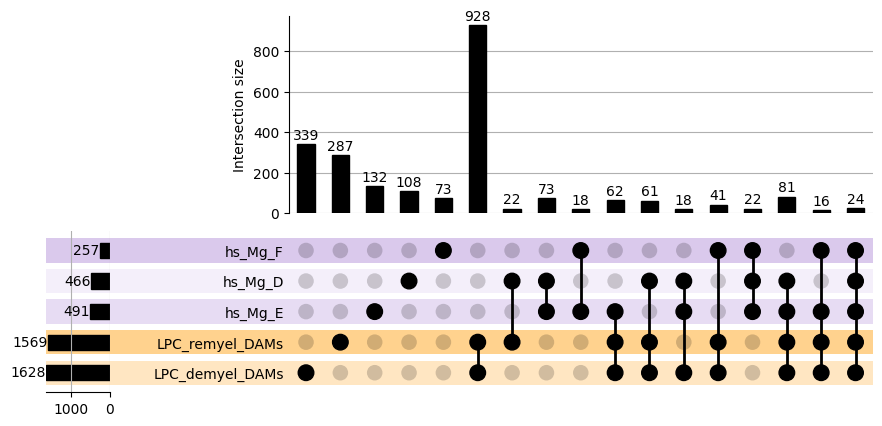

In [108]:
# Create UpSet plot
upset = UpSet(down_df_plot, subset_size='count', show_counts=True, facecolor="black", 
              min_degree=1, min_subset_size=15)

# Style the subsets
upset.style_categories(
    'LPC_demyel_DAMs',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_DAMs',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'Cupr_demyel_DAMs',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_DAMs',
    shading_facecolor="#bddbf6",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_D',
    shading_facecolor="#f4effa",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_E',
    shading_facecolor="#e7dcf3",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_F',
    shading_facecolor="#dac9ec",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/MG_upset_plot_down_hs_mm_N15_LPC_overlapping.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [111]:
# Merge all the DataFrames hierarchically
down_df2 = Cupr_de_down_df.merge(
    Cupr_re_down_df.merge(
        Mg_hs_d_cupr_down_df.merge(
            Mg_hs_e_cupr_down_df.merge( 
                Mg_hs_f_cupr_down_df, on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
down_df2 = down_df2.fillna(False)

# Set index for the data frame
down_df2_plot = down_df2.set_index([
    'Cupr_de_down', 'Cupr_re_down',
    'Mg_hs_d_cupr_down', 'Mg_hs_e_cupr_down', 'Mg_hs_f_cupr_down'
])

# Print the merged DataFrame
print("Downregulated genes DataFrame:")
print(down_df2_plot)

Downregulated genes DataFrame:
                                                                                   Name
Cupr_de_down Cupr_re_down Mg_hs_d_cupr_down Mg_hs_e_cupr_down Mg_hs_f_cupr_down        
True         False        False             False             False                AACS
             True         False             False             False               AAGAB
             False        False             False             False               ABCA3
             True         False             False             False               ABCB4
             False        False             False             False               ABCB7
...                                                                                 ...
                                                              False              ZSWIM7
                                                              False              ZSWIM8
                                                              False                ZXDC
 

/tmp/1211519.1.gpu/ipykernel_15381/1750529541.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  down_df2 = down_df2.fillna(False)


In [112]:
# Dictionary to map old index names to new index names
index_name_map = {
    'LPC_de_down': 'LPC_demyel_DAMs',
    'LPC_re_down': 'LPC_remyel_DAMs',
    'Cupr_de_down': 'Cupr_demyel_DAMs',
    'Cupr_re_down': 'Cupr_remyel_DAMs',
    'Mg_hs_d_cupr_down': 'hs_Mg_D',
    'Mg_hs_e_cupr_down': 'hs_Mg_E',
    'Mg_hs_f_cupr_down': 'hs_Mg_F',
}

# Rename the index levels using the dictionary
down_df2_plot.index = down_df2_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(down_df2_plot)

Updated Upregulated genes DataFrame:
                                                             Name
Cupr_demyel_DAMs Cupr_remyel_DAMs hs_Mg_D hs_Mg_E hs_Mg_F        
True             False            False   False   False      AACS
                 True             False   False   False     AAGAB
                 False            False   False   False     ABCA3
                 True             False   False   False     ABCB4
                 False            False   False   False     ABCB7
...                                                           ...
                                                  False    ZSWIM7
                                                  False    ZSWIM8
                                                  False      ZXDC
                                                  False    ZYG11B
                                                  False     ZZEF1

[2786 rows x 1 columns]


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

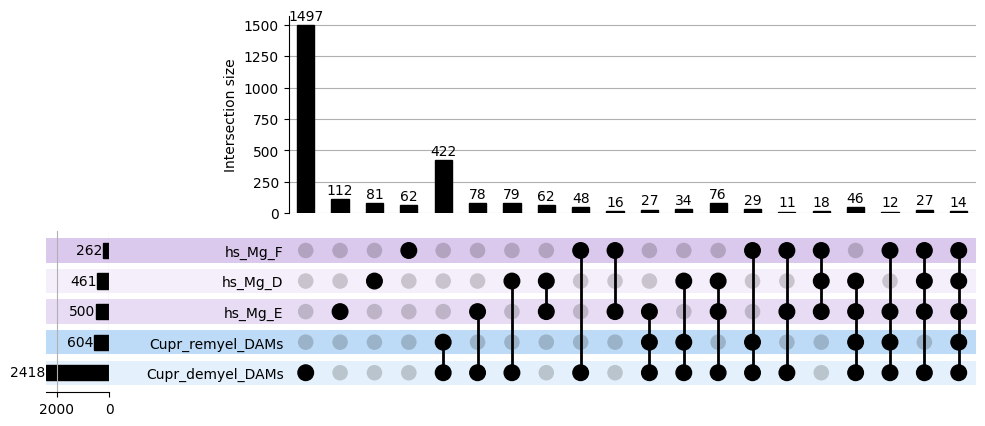

In [118]:
# Create UpSet plot
upset = UpSet(down_df2_plot, subset_size='count', show_counts=True, facecolor="black", 
              min_degree=1, min_subset_size=10)

# Style the subsets
upset.style_categories(
    'LPC_demyel_DAMs',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_DAMs',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'Cupr_demyel_DAMs',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_DAMs',
    shading_facecolor="#bddbf6",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_D',
    shading_facecolor="#f4effa",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_E',
    shading_facecolor="#e7dcf3",
)

# Style the subsets
upset.style_categories(
    'hs_Mg_F',
    shading_facecolor="#dac9ec",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/MG_upset_plot_down_hs_N10_mm_Cupr_overlapping.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [73]:
# Convert lists to sets for downregulated genes
set_LPC_demyel_2_down = set(genes_LPC_demyel_2_down)
set_LPC_de_down = set(genes_LPC_de_down)
set_LPC_re_down = set(genes_LPC_re_down)
set_Cupr_de_down = set(genes_Cupr_de_down)
set_Cupr_re_down = set(genes_Cupr_re_down)

set_Mg_hs_d_cupr_down = set(genes_Mg_hs_d_cupr_down)
set_Mg_hs_e_cupr_down = set(genes_Mg_hs_e_cupr_down)
set_Mg_hs_f_cupr_down = set(genes_Mg_hs_f_cupr_down)

set_Mg_hs_d_lpc_down = set(genes_Mg_hs_d_lpc_down)
set_Mg_hs_e_lpc_down = set(genes_Mg_hs_e_lpc_down)
set_Mg_hs_f_lpc_down = set(genes_Mg_hs_f_lpc_down)

In [119]:
# Overlap of upregulated genes
overlap_cupr = set_Cupr_de_down & set_Cupr_re_down & set_Mg_hs_d_cupr_down & set_Mg_hs_e_cupr_down & set_Mg_hs_f_cupr_down
print("Number of overlapping upregulated genes:", len(overlap_cupr))
print("Overlapping upregulated genes:", overlap_cupr)

Number of overlapping upregulated genes: 14
Overlapping upregulated genes: {'DIP2B', 'STRBP', 'TLN2', 'FRMD4A', 'SUSD3', 'TIAM1', 'PRDM11', 'DOCK8', 'JAM2', 'OTULINL', 'NAV3', 'KHDRBS3', 'SELPLG', 'SALL1'}


In [120]:
# Overlap of upregulated genes
overlap_lpc = set_LPC_de_down & set_LPC_re_down & set_Mg_hs_d_lpc_down & set_Mg_hs_e_lpc_down & set_Mg_hs_f_lpc_down
print("Number of overlapping upregulated genes:", len(overlap_lpc))
print("Overlapping upregulated genes:", overlap_lpc)

Number of overlapping upregulated genes: 24
Overlapping upregulated genes: {'PECR', 'SUSD3', 'DOCK8', 'TAL1', 'SELPLG', 'TIAM1', 'PBX1', 'SMAD6', 'SH3KBP1', 'PRDM11', 'SALL1', 'CYSLTR1', 'HECA', 'ANKRD44', 'NAV3', 'TLN2', 'ARHGEF6', 'RGS10', 'DIP2B', 'PALD1', 'MEMO1', 'FRMD4A', 'CLCN5', 'ATP11C'}


In [121]:
# Overlap of upregulated genes
overlap_cupr_lpc = overlap_cupr & overlap_lpc
print("Number of overlapping upregulated genes:", len(overlap_cupr_lpc))
print("Overlapping upregulated genes:", overlap_cupr_lpc)

Number of overlapping upregulated genes: 10
Overlapping upregulated genes: {'DIP2B', 'FRMD4A', 'SUSD3', 'TIAM1', 'DOCK8', 'NAV3', 'TLN2', 'SELPLG', 'SALL1', 'PRDM11'}


In [123]:
subset_df = Mg_hs_d[Mg_hs_d['gene'].isin(overlap_cupr_lpc)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

       gene gene_hs gene_mm     logFC   AveExpr         t        Pvalue  \
84   PRDM11  PRDM11  Prdm11 -3.479014  6.256134  8.434304  8.095466e-08   
154  SELPLG  SELPLG  Selplg -2.024676  5.913087  6.799185  9.406327e-07   
228   SUSD3   SUSD3   Susd3 -1.934642  5.421977  6.122059  4.247743e-06   
325   SALL1   SALL1   Sall1 -1.707539  5.989679  5.487533  1.832423e-05   
344   TIAM1   TIAM1   Tiam1 -1.648269  8.142999  5.606670  2.184068e-05   

         Padj         B     z.std  
84   0.000009  2.531547  5.364988  
154  0.000055  5.789920  4.903668  
228  0.000168  4.316003  4.598877  
325  0.000506  2.825659  4.284389  
344  0.000572  1.430201  4.245191  
PRDM11, SELPLG, SUSD3, SALL1, TIAM1, NAV3, TLN2, FRMD4A, DOCK8, DIP2B


In [125]:
# Overlap of upregulated genes
overlap_cupr_unique = overlap_cupr - overlap_lpc
print("Number of overlapping upregulated genes:", len(overlap_cupr_unique))
print("Overlapping upregulated genes:", overlap_cupr_unique)

Number of overlapping upregulated genes: 4
Overlapping upregulated genes: {'KHDRBS3', 'STRBP', 'JAM2', 'OTULINL'}


In [124]:
# Overlap of upregulated genes
overlap_lpc_unique = overlap_lpc - overlap_cupr
print("Number of overlapping upregulated genes:", len(overlap_lpc_unique))
print("Overlapping upregulated genes:", overlap_cupr_unique)

Number of overlapping upregulated genes: 14
Overlapping upregulated genes: {'PLAUR', 'METRNL', 'SDC3', 'RRAGD', 'RAB20', 'NFIL3', 'GADD45B', 'FGR', 'HPCAL1', 'ITGA4'}


In [126]:
subset_df = Mg_hs_d[Mg_hs_d['gene'].isin(overlap_cupr_unique)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene  gene_hs  gene_mm     logFC   AveExpr         t        Pvalue  \
156  KHDRBS3  KHDRBS3  Khdrbs3 -4.088807  7.710083  6.764013  1.015793e-06   
74   OTULINL  OTULINL  Otulinl -1.877579  7.269937  8.809045  5.309546e-08   
171     JAM2     JAM2     Jam2 -1.745010  5.757557  6.574468  1.541421e-06   
459    STRBP    STRBP    Strbp -1.006654  8.307272  4.974068  6.154277e-05   

         Padj         B     z.std  
156  0.000058  5.709265  4.888554  
74   0.000006  6.344860  5.440620  
171  0.000081  5.289846  4.805789  
459  0.001209  1.557631  4.006816  
KHDRBS3, OTULINL, JAM2, STRBP


In [127]:
subset_df = Mg_hs_d[Mg_hs_d['gene'].isin(overlap_lpc_unique)]
subset_df = subset_df.sort_values(by='logFC', ascending=True)
print(subset_df[:5])

sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene  gene_hs  gene_mm     logFC    AveExpr          t        Pvalue  \
270     PBX1     PBX1     Pbx1 -3.454287   4.146847   5.840052  8.755839e-06   
18   CYSLTR1  CYSLTR1  Cysltr1 -3.216151   4.686206  10.402207  8.443903e-10   
95   ANKRD44  ANKRD44  Ankrd44 -1.607437  10.613821   8.423264  1.562713e-07   
81    ATP11C   ATP11C   Atp11c -1.605348   6.750043   7.985022  7.754733e-08   
280    RGS10    RGS10    Rgs10 -1.532472   7.758785   6.398699  9.348022e-06   

             Padj          B     z.std  
270  2.920767e-04   1.289316  4.445817  
18   4.011689e-07  12.491766  6.136350  
95   1.471554e-05   5.719052  5.245013  
81   8.549120e-06   8.226880  5.372744  
280  3.007335e-04   2.443449  4.431730  
PBX1, CYSLTR1, ANKRD44, ATP11C, RGS10, TAL1, PALD1, MEMO1, CLCN5, ARHGEF6, SH3KBP1, HECA, PECR, SMAD6
